In [1]:
import numpy as np

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb

yf.pdr_override()

pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:,}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.family' : 'sans'})
sm, med, lg = 10, 15, 20
plt.rc('font', size = sm)         # controls default text sizes
plt.rc('axes', titlesize = med)   # fontsize of the axes title
plt.rc('axes', labelsize = med)   # fontsize of the x & y labels
plt.rc('xtick', labelsize = sm)   # fontsize of the tick labels
plt.rc('ytick', labelsize = sm)   # fontsize of the tick labels
plt.rc('legend', fontsize = sm)   # legend fontsize
plt.rc('figure', titlesize = lg)  # fontsize of the figure title
plt.rc('axes', linewidth=2)       # linewidth of plot lines

import seaborn as sns
sns.set()
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize

import statsmodels as stats
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import yfinance as yf
from yahooquery import Ticker
from yahoofinancials import YahooFinancials
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import *
from mpl_finance import candlestick_ohlc

import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

from itertools import *
from tqdm import tqdm_notebook
from patsy import dmatrices

import locale, sys, os
from datetime import date, datetime, timedelta
import time, csv, json
%load_ext autotime

from IPython.display import IFrame
# ![img](images/paintcarelogo.png)

import warnings
warnings.filterwarnings('ignore')

print('\n          * * * NO ISSUES - ALL IMPORTS LOADED * * * \n')


          * * * NO ISSUES - ALL IMPORTS LOADED * * * 

time: 10.4 ms


In [2]:
import yfinance as yf

%load_ext autotime

time: 654 µs


In [3]:


indicies = ['^GSPC', '^IXIC', '^DJI']

sp = tickers_sp500()
sp[61] = 'BF-B'
sp[71]= 'BRK-B'

time: 956 ms


In [32]:
years = [1, 3, 5]#, 10, 15, 20, 25, 30]

original_start = "2020-11-01"

start = ["2020-01-01"]
for year in years:
    new = int(original_start[:4]) - year
    start.append(str(str(new) + original_start[4:]))

end = "2020-11-01"

start

['2020-01-01', '2019-11-01', '2017-11-01', '2015-11-01']

time: 4.61 ms


In [31]:
start[0][:4]

'2020'

time: 2.94 ms


In [36]:
for s in start:
    sp505_hist = yf.download(sp, start = s, end=end)['Adj Close']
    sp505_hist.to_csv('data/sp505_hist_'+s+'.csv')

print('done')

[*********************100%***********************]  505 of 505 completed
[*********************100%***********************]  505 of 505 completed
[*********************100%***********************]  505 of 505 completed
[*********************100%***********************]  505 of 505 completed
done
time: 2min 16s


In [5]:
sp505_hist = yf.download(sp, start = start, end=end)['Adj Close']

sp505_hist.head()

[*********************100%***********************]  505 of 505 completed


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,...,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,101.037827,12.58,154.850006,116.588860,85.969269,94.964539,260.450012,108.279106,224.301666,499.510010,118.989998,46.265549,137.699997,233.960007,79.860001,82.383972,17.788588,36.154301,27.719999,26.206251,122.470001,105.610001,109.930000,86.730003,317.609985,...,97.654457,55.799889,23.452322,182.010681,210.080002,112.889999,18.780001,143.080002,60.790001,33.894741,275.631500,21.48,28.790001,72.070000,70.379997,105.609924,32.349522,43.509998,18.670000,82.325684,91.408997,137.330002,258.480011,28.869854,163.824951
2020-10-02,99.830002,13.00,155.500000,112.825348,84.962975,94.984451,261.989990,106.146210,221.532516,478.989990,114.010002,46.404545,138.669998,225.559998,79.809998,84.605743,18.404041,36.641129,28.219999,26.995642,123.430000,106.209999,108.610001,89.290001,314.890015,...,97.117729,57.303181,23.880356,183.024124,209.610001,113.889999,19.090000,140.500000,61.270000,34.850082,273.692627,21.40,29.110001,73.199997,70.480003,102.299324,32.203053,43.660000,19.049999,84.190376,94.743996,137.690002,258.809998,29.593582,163.345551
2020-10-05,103.120003,13.12,155.860001,116.299355,86.748657,95.990265,270.690002,108.199364,222.618271,486.470001,116.599998,47.437080,140.960007,228.929993,80.720001,86.341499,18.443747,37.187565,29.049999,27.181818,125.360001,107.059998,109.099998,94.760002,319.510010,...,97.545128,56.838348,24.338255,191.747604,210.139999,114.239998,19.540001,141.800003,62.040001,36.591591,287.474701,21.48,29.730000,73.849998,71.470001,104.443237,32.945152,44.810001,19.639999,86.075012,93.668831,141.589996,268.010010,31.011299,163.245667
2020-10-06,101.629997,12.53,155.160004,112.965111,84.736061,95.233414,264.820007,105.897041,219.490524,478.980011,115.540001,47.258369,142.259995,228.009995,81.300003,87.710266,18.523159,37.127953,28.980000,27.367994,122.900002,105.760002,108.160004,93.739998,316.079987,...,97.912888,56.037251,24.069489,189.392853,209.050003,113.250000,19.330000,140.630005,61.540001,35.934795,290.163116,21.73,28.990000,74.320000,72.449997,103.645508,32.603394,44.110001,19.709999,86.264473,91.508545,141.080002,269.970001,30.634562,161.318085
2020-10-07,103.879997,13.07,156.809998,114.881805,85.900208,95.193581,268.540009,107.382088,222.578430,493.149994,118.669998,47.963280,143.729996,233.009995,80.690002,87.888802,18.612499,37.664455,29.559999,27.025431,123.809998,106.419998,109.680000,96.690002,323.619995,...,97.455673,55.483406,24.696609,194.887253,211.119995,113.879997,19.389999,140.889999,61.810001,37.009552,292.541779,22.02,29.520000,75.059998,72.089996,105.530151,32.710804,45.049999,20.230000,87.949677,93.459770,144.830002,276.579987,31.873825,159.710098


time: 25.7 s


In [8]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = sp,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
data.head()

[*********************100%***********************]  505 of 505 completed


ORLY                                                    PKI  \
                  Open        High         Low       Close  Volume       Open   
Date                                                                            
2020-01-02  438.500000  439.059998  434.440002  437.519989  796100  97.975884   
2020-01-03  435.809998  439.220001  433.040009  438.750000  482900  96.440189   
2020-01-06  437.029999  437.029999  429.220001  434.660004  837100  96.101143   
2020-01-07  433.940002  434.510010  425.279999  428.769989  661500  97.457339   
2020-01-08  428.869995  437.570007  428.869995  431.899994  479500  98.564236   

                                                            UHS              \
                 High        Low      Close  Volume        Open        High   
Date                                                                          
2020-01-02  98.584183  97.407475  98.584183  708900  144.035014  144.035014   
2020-01-03  97.407484  95.502809  96.719406  558900  140.540477  141.948281   
2020-01-06  97.776457  95.782036  97.726593  464700  140.889933  142.197888   
2020-01-07  98.713818  97.008590  98.524353  441800  141.009745  142.727064   
2020-01-08  99.461727  96.988650  98.314934  597600  142.437520  145.193211   

                                                    PH              \
                   Low       Close  Volume        Open        High   
Date                                                                 
2020-01-02  140.790083  142.088058  403400  203.277547  205.987793   
2020-01-03  139.881517  141.748596  262700  201.922427  204.092571   
2020-01-06  140.500542  141.638763  434300  201.058294  203.248082   
2020-01-07  140.480573  142.207870  645700  203.169518  203.699790   
2020-01-08  142.048129  144.853745  828000  203.395404  203.798000   

                                                 ATVI                        \
                   Low       Close  Volume       Open       High        Low   
Date                                                                          
2020-01-02  202.433052  205.987793  845200  59.518558  59.657643  58.177380   
2020-01-03  199.526418  203.090973  895400  57.650838  58.544959  57.273323   
2020-01-06  200.046866  203.179352  734100  58.087968  59.478818  58.058161   
2020-01-07  201.303782  202.766922  699500  59.299993  60.015290  58.823130   
2020-01-08  201.991179  202.904419  711500  59.607969  60.492153  59.458948   

                                ...         SPG                          \
                Close   Volume  ...        Open        High         Low   
Date                            ...                                       
2020-01-02  58.266792  5189400  ...  141.604200  141.935906  137.282436   
2020-01-03  58.286655  4466300  ...  136.751669  138.353378  136.476826   
2020-01-06  59.349670  4910800  ...  137.509878  139.196882  136.941233   
2020-01-07  59.945747  4920300  ...  137.083412  137.889010  136.012443   
2020-01-08  59.488754  5021500  ...  137.339305  138.429218  136.505275   

                                       AJG                                   \
                 Close   Volume       Open       High        Low      Close   
Date                                                                          
2020-01-02  137.509888  1849300  94.370270  94.617029  93.393109  94.271568   
2020-01-03  137.756302  1308200  93.274663  94.281434  93.067387  94.074158   
2020-01-06  138.476593  1026700  93.817533  94.508453  93.304271  94.508453   
2020-01-07  136.903336  1621600  94.320918  94.508457  93.432594  93.491814   
2020-01-08  137.803696  1397600  93.521415  94.538059  93.472061  93.620117   

                            NSC                                               \
             Volume        Open        High         Low       Close   Volume   
Date                                                                           
2020-01-02   724500  191.348760  193.065552  190.583562  193.065552 

time: 29.5 s


In [6]:
from pandas_datareader import data as pdr

yf.pdr_override()

data = pdr.get_data_yahoo(sp, start = start, end=end)['Adj Close']

data.head()

[*********************100%***********************]  505 of 505 completed


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,...,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,101.037827,12.58,154.850006,116.588860,85.969269,94.964539,260.450012,108.279106,224.301666,499.510010,118.989998,46.265549,137.699997,233.960007,79.860001,82.383972,17.788588,36.154301,27.719999,26.206251,122.470001,105.610001,109.930000,86.730003,317.609985,...,97.654457,55.799889,23.452322,182.010681,210.080002,112.889999,18.780001,143.080002,60.790001,33.894741,275.631500,21.48,28.790001,72.070000,70.379997,105.609924,32.349522,43.509998,18.670000,82.325684,91.408997,137.330002,258.480011,28.869854,163.824951
2020-10-02,99.830002,13.00,155.500000,112.825348,84.962975,94.984451,261.989990,106.146210,221.532516,478.989990,114.010002,46.404545,138.669998,225.559998,79.809998,84.605743,18.404041,36.641129,28.219999,26.995642,123.430000,106.209999,108.610001,89.290001,314.890015,...,97.117729,57.303181,23.880356,183.024124,209.610001,113.889999,19.090000,140.500000,61.270000,34.850082,273.692627,21.40,29.110001,73.199997,70.480003,102.299324,32.203053,43.660000,19.049999,84.190376,94.743996,137.690002,258.809998,29.593582,163.345551
2020-10-05,103.120003,13.12,155.860001,116.299355,86.748657,95.990265,270.690002,108.199364,222.618271,486.470001,116.599998,47.437080,140.960007,228.929993,80.720001,86.341499,18.443747,37.187565,29.049999,27.181818,125.360001,107.059998,109.099998,94.760002,319.510010,...,97.545128,56.838348,24.338255,191.747604,210.139999,114.239998,19.540001,141.800003,62.040001,36.591591,287.474701,21.48,29.730000,73.849998,71.470001,104.443237,32.945152,44.810001,19.639999,86.075012,93.668831,141.589996,268.010010,31.011299,163.245667
2020-10-06,101.629997,12.53,155.160004,112.965111,84.736061,95.233414,264.820007,105.897041,219.490524,478.980011,115.540001,47.258369,142.259995,228.009995,81.300003,87.710266,18.523159,37.127953,28.980000,27.367994,122.900002,105.760002,108.160004,93.739998,316.079987,...,97.912888,56.037251,24.069489,189.392853,209.050003,113.250000,19.330000,140.630005,61.540001,35.934795,290.163116,21.73,28.990000,74.320000,72.449997,103.645508,32.603394,44.110001,19.709999,86.264473,91.508545,141.080002,269.970001,30.634562,161.318085
2020-10-07,103.879997,13.07,156.809998,114.881805,85.900208,95.193581,268.540009,107.382088,222.578430,493.149994,118.669998,47.963280,143.729996,233.009995,80.690002,87.888802,18.612499,37.664455,29.559999,27.025431,123.809998,106.419998,109.680000,96.690002,323.619995,...,97.455673,55.483406,24.696609,194.887253,211.119995,113.879997,19.389999,140.889999,61.810001,37.009552,292.541779,22.02,29.520000,75.059998,72.089996,105.530151,32.710804,45.049999,20.230000,87.949677,93.459770,144.830002,276.579987,31.873825,159.710098


time: 27.2 s


In [9]:
import yfinance as yf

tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consu

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-26,113.81,116.35,112.69,114.85,111850700,0.000,0
2020-10-27,115.29,117.08,114.34,116.40,92276800,0.000,0
2020-10-28,114.85,115.23,110.91,111.01,143937800,0.000,0
2020-10-29,112.18,116.73,112.01,115.12,146129200,0.000,0
2020-10-30,110.87,111.80,107.53,108.67,190272600,0.000,0
2020-11-02,108.92,110.49,107.14,108.58,122866900,0.000,0
2020-11-03,109.47,111.30,108.54,110.25,107624400,0.000,0
2020-11-04,113.94,115.39,112.16,114.75,138235500,0.000,0
2020-11-05,117.75,119.41,116.67,118.82,126387100,0.000,0


,Dividends,Stock Splits
Date,,
2014-03-27,0.0,2.002
2015-04-27,0.0,1.000


time: 5 s


In [11]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
info = msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
actions = msft.actions

# show dividends
divs = msft.dividends

# show splits
split = msft.splits

# show financials
fins = msft.financials
fins_quarter = msft.quarterly_financials

# show major holders
majorHolders = msft.major_holders

# show institutional holders
instituteHolders = msft.institutional_holders

# show balance sheet
balance = msft.balance_sheet
balanceQuarter = msft.quarterly_balance_sheet

# show cashflow
cashFlow = msft.cashflow
cashFlow_quarter = msft.quarterly_cashflow

# show earnings
earn = msft.earnings
earnQuarter = msft.quarterly_earnings

# show sustainability
suitabile = msft.sustainability

# show analysts recommendations
recommendation = msft.recommendations

# show next event (earnings, etc)
calendar = msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
isins = msft.isin

# show options expirations
option = msft.options

# get option chain for specific expiration
opt = msft.option_chain()
# data available via: opt.calls, opt.puts

time: 4.88 s


In [13]:
# get stock info
info = msft.info

info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consu

time: 4.74 ms


In [14]:
# get historical market data
hist = msft.history(period="max")

time: 787 ms


In [15]:
# show actions (dividends, splits)
action = msft.actions
action

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2019-11-20,0.51,0.0
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0


time: 15.6 ms


In [16]:
# show dividends
dividends = msft.dividends
dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2019-11-20    0.51
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
Name: Dividends, Length: 68, dtype: float64

time: 4.31 ms


In [17]:
# show splits
splits = msft.splits
splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

time: 3.73 ms


In [20]:
# show financials
msft.financials
msft.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


time: 10.1 ms


In [21]:
# show major holders
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,71.91%,% of Shares Held by Institutions
2,71.95%,% of Float Held by Institutions
3,4875,Number of Institutions Holding Shares


time: 5.98 ms


In [22]:
# show institutional holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",622689597,2020-09-29,0.0824,130970302937
1,Blackrock Inc.,516065148,2020-09-29,0.0683,108543982578
2,State Street Corporation,309004107,2020-09-29,0.0409,64992833825
3,"FMR, LLC",236747226,2020-09-29,0.0313,49795044044
4,Price (T.Rowe) Associates Inc,180419808,2020-09-29,0.0239,37947698216
5,"Geode Capital Management, LLC",116538073,2020-09-29,0.0154,24511452894
6,Capital World Investors,111872823,2020-09-29,0.0148,23530210861
7,Capital International Investors,94601027,2020-09-29,0.0125,19897434008
8,Capital Research Global Investors,94009486,2020-09-29,0.0124,19773015190
9,Northern Trust Corporation,93421404,2020-09-29,0.0124,19649323903


time: 9.43 ms


In [27]:
# show sustainability
msft.sustainability

,Value
2020-10,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


time: 7.29 ms


In [131]:
# show analysts recommendations
recommendation = msft.recommendations
# recommendation.reset_index()


new = []
date = []
for r in recommendation.index:
    date.append(r)
    new.append(str(r)[:10])

recommendation.index = new
recommendation['date'] = date

year = []
for r in recommendation.index:
    year.append(int(r[:4]))

recommendation['year'] = year
recommendation[recommendation['year'] > 2019]

recommendation.sort_values('date', ascending = False, inplace = True)

,Firm,To Grade,From Grade,Action,year,date
2020-11-24,KeyBanc,Overweight,,init,2020,2020-11-24
2020-11-05,Oppenheimer,Outperform,Perform,up,2020,2020-11-05
2020-10-29,Deutsche Bank,Buy,,main,2020,2020-10-29
2020-10-28,Credit Suisse,Outperform,,main,2020,2020-10-28
2020-10-28,Morgan Stanley,Overweight,,main,2020,2020-10-28
...,...,...,...,...,...,...
2020-01-13,Credit Suisse,Outperform,,main,2020,2020-01-13
2020-01-10,Jefferies,Buy,,main,2020,2020-01-10
2020-01-09,Wedbush,Outperform,,main,2020,2020-01-09
2020-01-09,Cowen & Co.,Outperform,,main,2020,2020-01-09


time: 16.9 ms


In [134]:
counts = []
for s in grade_set1:
    counts.append(grade_list.count(s))

fd = pd.DataFrame()

fd['grade'] = grade_set1
fd['counts'] = counts
fd.set_index('grade', inplace = True)
fd

,counts
grade,
Neutral,37
Sector Perform,2
Underweight,2
Equal-Weight,6
Overweight,62
Long-Term Buy,1
Sell,10
Buy,84
Perform,1


time: 7.83 ms


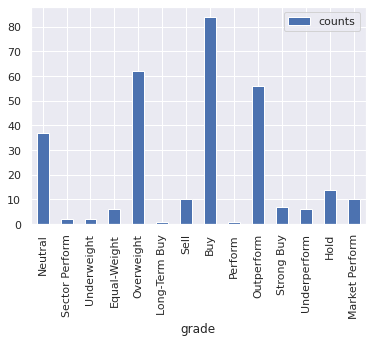

time: 399 ms


In [135]:
fd.plot(kind = 'bar');

In [29]:
# show next event (earnings, etc)
msft.calendar

,0,1
Earnings Date,2021-01-27 00:00:00,2021-02-01 00:00:00
Earnings Average,1.64,1.64
Earnings Low,1.57,1.57
Earnings High,1.86,1.86
Revenue Average,40202900000,40202900000
Revenue Low,39888000000,39888000000
Revenue High,41145000000,41145000000


time: 4.97 ms


In [30]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

'US5949181045'

time: 2.33 ms


In [31]:
# show options expirations
msft.options

('2020-11-26',
 '2020-12-03',
 '2020-12-10',
 '2020-12-17',
 '2020-12-23',
 '2020-12-30',
 '2021-01-14',
 '2021-02-18',
 '2021-03-18',
 '2021-04-15',
 '2021-06-17',
 '2021-07-15',
 '2021-09-16',
 '2022-01-20',
 '2022-03-17',
 '2022-06-16',
 '2022-09-15',
 '2023-01-19')

time: 2.27 ms


In [33]:
# get option chain for specific expiration
opt = msft.option_chain()
opt
# data available via: opt.calls, opt.puts

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   MSFT201127C00165000 2020-11-25 16:46:12   165.0      47.75  48.25  49.35   
1   MSFT201127C00170000 2020-11-25 20:22:21   170.0      44.00  43.25  44.35   
2   MSFT201127C00175000 2020-11-24 20:54:40   175.0      38.90  38.25  39.35   
3   MSFT201127C00180000 2020-11-25 18:35:36   180.0      33.25  33.25  34.30   
4   MSFT201127C00182500 2020-11-16 05:12:17   182.5      28.20  30.75  31.85   
5   MSFT201127C00185000 2020-11-23 17:06:42   185.0      23.62  28.25  29.35   
6   MSFT201127C00187500 2020-11-17 19:48:06   187.5      28.05  25.75  26.85   
7   MSFT201127C00190000 2020-11-25 19:38:18   190.0      23.85  23.25  24.35   
8   MSFT201127C00192500 2020-11-25 17:32:25   192.5      20.90  20.75  21.85   
9   MSFT201127C00195000 2020-11-25 14:56:53   195.0      19.20  18.30  19.35   
10  MSFT201127C00197500 2020-11-25 20:48:36   197.5      16.45  15.80  16.85   
11  MSFT201127C00200000 20

time: 223 ms


In [136]:
import yfinance as yf

tsla = yf.Ticker('tsla')

tsla_hist = tsla.history(period = 'max')
tsla_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.80,5.00,3.51,4.78,93831500,0,0.0
2010-06-30,5.16,6.08,4.66,4.77,85935500,0,0.0
2010-07-01,5.00,5.18,4.05,4.39,41094000,0,0.0
2010-07-02,4.60,4.62,3.74,3.84,25699000,0,0.0
2010-07-06,4.00,4.00,3.17,3.22,34334500,0,0.0


time: 665 ms


In [137]:
tsla_hist = tsla_hist.reset_index()

for i in ['Open', 'High', 'Close', 'Low']:
    tsla_hist[i] = tsla_hist[i].astype('float64')

time: 5.2 ms


In [138]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Candlestick(x= tsla_hist['Date'], open = tsla_hist['Open'], high = tsla_hist['High'], low = tsla_hist['Low'], close = tsla_hist['Close'])])
fig.show()

time: 124 ms


# yahoo_fin

*    get_analysts_info
*    get_balance_sheet
*    get_cash_flow
*    get_data
*    get_day_gainers
*    get_day_losers
*    get_day_most_active
*    get_dividends
*    get_earnings
*    get_financials
*    get_holders
*    get_income_statement
*    get_live_price
*    get_quote_table
*    get_top_crypto
*    get_splits
*    get_stats
*    get_stats_valuation
*    tickers_dow
*    tickers_nasdaq
*    tickers_other
*    tickers_sp500

In [139]:
import plotly.express as px

fig = px.line(tsla_hist, x="Date", y="Open", title='TSLA Stock Prices')
fig.show()

time: 264 ms


In [2]:
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import *

In [125]:
# get yearly data
get_balance_sheet('nflx')
 
# get quarterly data
# get_balance_sheet('nflx', yearly = False)

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
intangibleAssets,1.470335e+10,1.495114e+10,1.037106e+10,7.274501e+09
totalLiab,2.639356e+10,2.073564e+10,1.543079e+10,1.090681e+10
totalStockholderEquity,7.582157e+09,5.238765e+09,3.581956e+09,2.679800e+09
otherCurrentLiab,5.338306e+09,5.442461e+09,4.791663e+09,4.076183e+09
totalAssets,3.397571e+10,2.597440e+10,1.901274e+10,1.358661e+10
commonStock,2.793929e+09,2.315988e+09,1.871396e+09,1.599762e+09
retainedEarnings,4.811749e+09,2.942359e+09,1.731117e+09,1.128603e+09
otherLiab,3.355987e+09,3.888257e+09,3.465042e+09,2.955842e+09
treasuryStock,-2.352100e+07,-1.958200e+07,-2.055700e+07,-4.856500e+07


time: 634 ms


In [126]:
# get yearly data
get_cash_flow('nflx')
 
# get quarterly data
# get_cash_flow('nflx', yearly = False)

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
changeToLiabilities,2.599090e+08,3.414750e+08,2.525330e+08,1.289980e+08
totalCashflowsFromInvestingActivities,-3.870640e+08,-3.391200e+08,3.432900e+07,4.976500e+07
netBorrowings,4.469306e+09,3.961852e+09,3.020510e+09,1.000000e+09
totalCashFromFinancingActivities,4.505662e+09,4.048527e+09,3.076990e+09,1.091630e+09
changeToOperatingActivities,-2.168660e+08,-4.770800e+07,-1.935560e+08,6.338200e+07
issuanceOfStock,7.249000e+07,1.245020e+08,8.837800e+07,3.697900e+07
netIncome,1.866916e+09,1.211242e+09,5.589290e+08,1.866780e+08
changeInCash,1.231745e+09,9.892460e+08,1.355219e+09,-3.417540e+08
effectOfExchangeRate,4.690000e+05,-3.968200e+07,2.984800e+07,-9.165000e+06


time: 734 ms


In [128]:
msft_data = get_data('msft')

# from1999 = get_data('msft' , start_date = '01/01/1999') 
# few_days = get_data('msft' , start_date = '01/01/1999' , end_date = '01/10/1999')

time: 472 ms


In [130]:
weekly_data = get_data("msft", interval = "1wk")
weekly_data

,open,high,low,close,adjclose,volume,ticker
1986-03-10,0.088542,0.102431,0.088542,0.100694,0.064103,1339948800,MSFT
1986-03-17,0.100694,0.103299,0.091146,0.092882,0.059130,367257600,MSFT
1986-03-24,0.092882,0.096354,0.089410,0.096354,0.061340,136972800,MSFT
1986-03-31,0.096354,0.098958,0.093750,0.096354,0.061340,100598400,MSFT
1986-04-07,0.096354,0.101562,0.092882,0.099826,0.063551,70070400,MSFT
...,...,...,...,...,...,...,...
2020-11-02,204.289993,224.360001,200.119995,223.720001,223.135818,161978000,MSFT
2020-11-09,224.440002,228.119995,209.720001,216.509995,215.944641,158095900,MSFT
2020-11-16,214.869995,217.740005,209.929993,210.389999,209.840622,125102000,MSFT
2020-11-23,210.949997,215.289993,208.160004,213.869995,213.869995,80651100,MSFT


time: 332 ms


In [131]:
monthly_data = get_data("msft", interval = "1mo")
monthly_data

,open,high,low,close,adjclose,volume,ticker
1986-03-01,0.088542,0.103299,0.088542,0.095486,0.060788,1857052800,MSFT
1986-04-01,0.095486,0.121962,0.092882,0.111979,0.071287,547142400,MSFT
1986-05-01,0.111979,0.123264,0.107639,0.121528,0.077366,333446400,MSFT
1986-06-01,0.121528,0.121528,0.102431,0.106771,0.067972,293788800,MSFT
1986-07-01,0.106771,0.109375,0.090278,0.098958,0.062998,460800000,MSFT
...,...,...,...,...,...,...,...
2020-08-01,211.520004,231.149994,203.139999,225.529999,224.398651,692473600,MSFT
2020-09-01,225.509995,232.860001,196.250000,210.330002,209.780777,768193600,MSFT
2020-10-01,213.490005,225.210007,199.619995,202.470001,201.941315,631648000,MSFT
2020-11-01,204.289993,228.119995,200.119995,213.869995,213.311539,525827000,MSFT


time: 295 ms


In [132]:
get_day_gainers()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,WORK,"Slack Technologies, Inc.",40.700,11.1200,37.59,1.391460e+08,1.639700e+07,2.322000e+10,NaN
1,FSR,Fisker Inc.,21.860,5.8900,36.88,6.290300e+07,1.088800e+07,6.061000e+09,NaN
2,ODMUF,Old Mutual Limited,0.800,0.2000,33.33,2.035000e+13,3.860000e+11,3.819000e+09,NaN
3,APPN,Appian Corporation,174.900,42.0900,31.69,4.952000e+06,8.413350e+14,1.225200e+10,NaN
4,GCPEF,GCL-Poly Energy Holdings Limited,0.097,0.0201,26.14,1.020850e+14,1.360400e+13,1.855000e+09,9.70
...,...,...,...,...,...,...,...,...,...
95,PYPL,"PayPal Holdings, Inc.",214.460,8.4600,4.11,1.381700e+07,9.487000e+06,2.512810e+11,80.93
96,LOGI,Logitech International S.A.,85.940,3.3900,4.11,1.063000e+06,9.082330e+14,1.418900e+10,21.77
97,ZS,"Zscaler, Inc.",146.940,5.7500,4.07,2.330000e+06,2.255000e+06,1.952900e+10,NaN
98,SID,Companhia Siderúrgica Nacional,4.370,0.1700,4.05,2.140000e+06,2.137000e+06,5.941000e+09,6.10


time: 1.31 s


In [133]:
get_day_losers()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,GPS,"The Gap, Inc.",21.60,-5.2700,-19.61,5.349300e+07,9.889000e+06,8.070000e+09,NaN
1,CRSR,"Corsair Gaming, Inc.",42.80,-8.4600,-16.50,8.352000e+06,2.798000e+06,3.934000e+09,NaN
2,NKLA,Nikola Corporation,30.24,-4.2600,-12.35,3.821700e+07,3.048400e+07,1.161500e+10,NaN
3,ALXO,ALX Oncology Holdings Inc.,67.87,-7.3400,-9.76,2.000650e+14,1.622180e+14,2.518000e+09,NaN
4,XPEV,XPeng Inc.,64.15,-6.4800,-9.17,4.919700e+07,2.382900e+07,4.617200e+10,NaN
...,...,...,...,...,...,...,...,...,...
95,BAM,Brookfield Asset Management Inc.,41.56,-1.4800,-3.44,2.702000e+06,2.519000e+06,6.277500e+10,NaN
96,MAX,"MediaAlpha, Inc.",38.35,-1.3600,-3.42,1.468770e+14,6.039040e+14,2.251000e+09,NaN
97,ROCK,"Gibraltar Industries, Inc.",66.16,-2.3400,-3.42,1.819740e+14,1.962410e+14,2.152000e+09,24.86
98,LGGNY,Legal & General Group Plc,17.58,-0.6200,-3.41,2.052400e+13,3.419000e+13,2.073500e+10,9.23


time: 1.55 s


In [134]:
get_day_most_active()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,NIO,NIO Limited,53.69,0.18,0.34,202317000.0,161721000.0,7.3135e+10,NaN
1,PLTR,Palantir Technologies Inc.,29.05,5.23,21.96,201380000.0,57304000.0,5.4554e+10,NaN
2,WORK,"Slack Technologies, Inc.",40.70,11.12,37.59,139146000.0,16397000.0,2.322e+10,NaN
3,FCEL,"FuelCell Energy, Inc.",8.84,1.17,15.25,121608000.0,38063000.0,2.605e+09,NaN
4,GE,General Electric Company,10.50,0.05,0.48,108625000.0,112343000.0,9.1979e+10,29.83
5,AAL,American Airlines Group Inc.,14.94,0.12,0.81,99553000.0,66738000.0,9.039e+09,NaN
6,F,Ford Motor Company,9.08,-0.37,-3.92,94242000.0,64901000.0,3.6124e+10,NaN
7,AAPL,Apple Inc.,116.03,0.86,0.75,72875000.0,144913000.0,1.973T1.973T1.973T1.973T1.973T1.973T1.973T1.97...,35.38
8,ITUB,Itaú Unibanco Holding S.A.,5.55,-0.02,-0.36,65237000.0,34718000.0,5.0535e+10,8.67
9,FSR,Fisker Inc.,21.86,5.89,36.88,62903000.0,10888000.0,6.061e+09,NaN


time: 1.73 s


In [135]:
# get all historical dividend data
get_dividends("msft")
 
# dividends from 2010 onward
# get_dividends("msft", "01-01-2010")

,dividend,ticker
2003-02-19,0.08,MSFT
2003-10-15,0.16,MSFT
2004-08-23,0.08,MSFT
2004-11-15,3.08,MSFT
2005-02-15,0.08,MSFT
...,...,...
2019-11-20,0.51,MSFT
2020-02-19,0.51,MSFT
2020-05-20,0.51,MSFT
2020-08-19,0.51,MSFT


time: 474 ms


In [136]:
get_earnings('nflx')

{'quarterly_results':      date  actual  estimate
 0  4Q2019    1.30      0.53
 1  1Q2020    1.57      1.65
 2  2Q2020    1.59      1.81
 3  3Q2020    1.74      2.14,
 'yearly_revenue_earnings':    date      revenue    earnings
 0  2016   8830669000   186678000
 1  2017  11692713000   558929000
 2  2018  15794341000  1211242000
 3  2019  20156447000  1866916000,
 'quarterly_revenue_earnings':      date     revenue   earnings
 0  4Q2019  5467434000  586970000
 1  1Q2020  5767691000  709067000
 2  2Q2020  6148286000  720196000
 3  3Q2020  6435637000  789976000}

time: 694 ms


In [137]:
# get both yearly and quarterly info
get_financials('nflx')
 
# get only yearly data
get_financials('nflx', yearly = True, quarterly = False)
 
# get only quarterly data
get_financials('nflx', yearly = False, quarterly = True)

{'yearly_income_statement': endDate                             2019-12-31   2018-12-31   2017-12-31  \
 Breakdown                                                                  
 researchDevelopment                 1545149000   1221814000    953710000   
 effectOfAccountingCharges                 None         None         None   
 incomeBeforeTax                     2062231000   1226458000    485321000   
 minorityInterest                          None         None         None   
 netIncome                           1866916000   1211242000    558929000   
 sellingGeneralAdministrative        3566831000   2999763000   1867324000   
 grossProfit                         7716234000   5826803000   3659713000   
 ebit                                2604254000   1605226000    838679000   
 operatingIncome                     2604254000   1605226000    838679000   
 otherOperatingExpenses                    None         None         None   
 interestExpense                     -626023000  

{'yearly_income_statement': endDate                             2019-12-31   2018-12-31   2017-12-31  \
 Breakdown                                                                  
 researchDevelopment                 1545149000   1221814000    953710000   
 effectOfAccountingCharges                 None         None         None   
 incomeBeforeTax                     2062231000   1226458000    485321000   
 minorityInterest                          None         None         None   
 netIncome                           1866916000   1211242000    558929000   
 sellingGeneralAdministrative        3566831000   2999763000   1867324000   
 grossProfit                         7716234000   5826803000   3659713000   
 ebit                                2604254000   1605226000    838679000   
 operatingIncome                     2604254000   1605226000    838679000   
 otherOperatingExpenses                    None         None         None   
 interestExpense                     -626023000  

{'quarterly_income_statement': endDate                            2020-09-30  2020-06-30  2020-03-31  \
 Breakdown                                                               
 researchDevelopment                 453802000   435045000   453817000   
 effectOfAccountingCharges                None        None        None   
 incomeBeforeTax                     861460000  1035602000   795870000   
 minorityInterest                         None        None        None   
 netIncome                           789976000   720196000   709067000   
 sellingGeneralAdministrative        799221000   711606000   755917000   
 grossProfit                        2567886000  2504579000  2167990000   
 ebit                               1314863000  1357928000   958256000   
 operatingIncome                    1314863000  1357928000   958256000   
 otherOperatingExpenses                   None        None        None   
 interestExpense                    -197079000  -189151000  -184083000   
 extraor

time: 2.35 s


In [138]:
get_holders('nflx')

{'Major Holders':     1.55%        % of Shares Held by All Insider
 0  82.03%       % of Shares Held by Institutions
 1  83.31%        % of Float Held by Institutions
 2    2268  Number of Institutions Holding Shares,
 'Direct Holders (Forms 3 and 4)':                               Holder    Shares Date Reported  % Out  \
 0         Vanguard Group, Inc. (The)  33583091  Sep 29, 2020  7.60%   
 1  Capital Research Global Investors  30882260  Sep 29, 2020  6.99%   
 2                     Blackrock Inc.  29022083  Sep 29, 2020  6.57%   
 3                           FMR, LLC  20642740  Sep 29, 2020  4.67%   
 4      Price (T.Rowe) Associates Inc  20121056  Sep 29, 2020  4.55%   
 5           State Street Corporation  16491812  Sep 29, 2020  3.73%   
 6    Capital International Investors  16201903  Sep 29, 2020  3.67%   
 7            Capital World Investors  13649248  Sep 29, 2020  3.09%   
 8            Jennison Associates LLC   8112145  Sep 29, 2020  1.84%   
 9        Baillie Gifford an

time: 1.65 s


In [139]:
# get yearly data
get_income_statement('nflx')
 
# get quarterly data
get_income_statement('nflx', yearly = False)

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
researchDevelopment,1545149000,1221814000,953710000,780232000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,2062231000,1226458000,485321000,260507000
minorityInterest,None,None,None,None
netIncome,1866916000,1211242000,558929000,186678000
sellingGeneralAdministrative,3566831000,2999763000,1867324000,1413182000
grossProfit,7716234000,5826803000,3659713000,2573207000
ebit,2604254000,1605226000,838679000,379793000
operatingIncome,2604254000,1605226000,838679000,379793000


endDate,2020-09-30,2020-06-30,2020-03-31,2019-12-31
Breakdown,,,,
researchDevelopment,453802000,435045000,453817000,409376000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,861460000,1035602000,795870000,149333000
minorityInterest,None,None,None,None
netIncome,789976000,720196000,709067000,586970000
sellingGeneralAdministrative,799221000,711606000,755917000,1133523000
grossProfit,2567886000,2504579000,2167990000,2001411000
ebit,1314863000,1357928000,958256000,458512000
operatingIncome,1314863000,1357928000,958256000,458512000


time: 1.22 s


In [140]:
get_live_price('nflx')

485.0

time: 374 ms


In [141]:
get_quote_table('aapl')

{'1y Target Est': 124.81,
 '52 Week Range': '53.15 - 137.98',
 'Ask': '116.28 x 1800',
 'Avg. Volume': 144912775.0,
 'Beta (5Y Monthly)': 1.35,
 'Bid': '116.26 x 1400',
 "Day's Range": '115.17 - 116.75',
 'EPS (TTM)': 3.28,
 'Earnings Date': 'Jan 26, 2021 - Feb 01, 2021',
 'Ex-Dividend Date': 'Nov 06, 2020',
 'Forward Dividend & Yield': '0.82 (0.71%)',
 'Market Cap': '1.973T',
 'Open': 115.55,
 'PE Ratio (TTM)': 35.38,
 'Previous Close': 115.17,
 'Quote Price': 116.02999877929688,
 'Volume': 72875142.0}

time: 5.14 s


In [142]:
get_splits("msft")

,splitRatio,ticker
1987-09-21,2:1,MSFT
1990-04-16,2:1,MSFT
1991-06-27,3:2,MSFT
1992-06-15,3:2,MSFT
1994-05-23,2:1,MSFT
1996-12-09,2:1,MSFT
1998-02-23,2:1,MSFT
1999-03-29,2:1,MSFT
2003-02-18,2:1,MSFT


time: 465 ms


In [143]:
get_stats('nflx')

,Attribute,Value
0,Beta (5Y Monthly),1.02
1,52-Week Change 3,54.13%
2,S&P500 52-Week Change 3,15.56%
3,52 Week High 3,575.37
4,52 Week Low 3,290.25
5,50-Day Moving Average 3,501.19
6,200-Day Moving Average 3,483.58
7,Avg Vol (3 month) 3,6.11M
8,Avg Vol (10 day) 3,3.79M
9,Shares Outstanding 5,441.8M


time: 4.55 s


In [144]:
get_stats_valuation('nflx')

,Unnamed: 0,As of Date: 11/24/2020Current,9/30/2020,6/30/2020,3/31/2020,12/31/2019,9/30/2019
0,Market Cap (intraday) 5,210.57B,220.91B,200.68B,165.14B,141.98B,117.28B
1,Enterprise Value 3,218.22B,229.55B,210.20B,174.88B,149.98B,124.87B
2,Trailing P/E,77.00,84.46,92.11,90.92,103.71,105.36
3,Forward P/E 1,54.64,57.47,71.94,62.50,61.73,48.78
4,PEG Ratio (5 yr expected) 1,2.05,2.18,3.02,2.75,2.23,1.76
5,Price/Sales (ttm),9.07,10.00,9.61,8.42,7.74,6.86
6,Price/Book (mrq),20.38,23.67,23.86,21.78,20.69,19.21
7,Enterprise Value/Revenue 3,9.16,35.67,34.19,30.32,27.43,23.81
8,Enterprise Value/EBITDA 6,15.08,56.30,52.66,50.08,51.51,35.82


time: 4.11 s


In [4]:
get_top_crypto().head(13)

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,17208.530000,-138.730000,-0.80,3.193090e+11,6.087600e+10,6.087600e+10,6.087600e+10,1.855500e+07
1,ETH-USD,Ethereum USD,520.530000,-9.590000,-1.81,5.912800e+10,3.055700e+10,3.055700e+10,3.055700e+10,1.135930e+08
2,XRP-USD,XRP USD,0.543400,-0.037700,-6.49,2.464000e+10,2.400600e+10,2.400600e+10,2.400600e+10,4.534800e+10
3,USDT-USD,Tether USD,1.001600,-0.000500,-0.05,1.898700e+10,1.125930e+11,1.125930e+11,1.125930e+11,1.895800e+10
4,BCH-USD,BitcoinCash USD,269.550000,-6.580000,-2.38,5.009000e+09,4.700000e+09,4.700000e+09,4.700000e+09,1.858300e+07
5,LINK-USD,Chainlink USD,12.650000,-0.160000,-1.28,4.976000e+09,3.081000e+09,3.081000e+09,3.081000e+09,3.935100e+08
6,LTC-USD,Litecoin USD,70.630000,0.210000,0.30,4.659000e+09,8.827000e+09,8.827000e+09,8.827000e+09,6.595800e+07
7,DOT1-USD,Polkadot USD,5.065446,0.163651,3.34,4.464000e+09,1.396000e+09,1.396000e+09,1.396000e+09,8.812600e+08
8,ADA-USD,Cardano USD,0.137700,0.001000,0.75,4.285000e+09,2.453000e+09,2.453000e+09,2.453000e+09,3.111200e+10
9,DOT2-USD,Polkadot USD,4.711000,0.029000,0.62,4.150000e+09,1.410000e+09,1.410000e+09,1.410000e+09,8.810240e+08


In [155]:
dow_tickers = tickers_dow()
print(len(dow_tickers))
dow_tickers

30


['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

time: 3.83 s


In [154]:
nasdaq_tickers = tickers_nasdaq()
print(len(nasdaq_tickers))
nasdaq_tickers

3841


['AACG',
 'AACQ',
 'AACQU',
 'AACQW',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AAWW',
 'AAXJ',
 'AAXN',
 'ABCB',
 'ABCM',
 'ABEO',
 'ABIO',
 'ABMD',
 'ABST',
 'ABTX',
 'ABUS',
 'ACACU',
 'ACAD',
 'ACAM',
 'ACAMU',
 'ACAMW',
 'ACBI',
 'ACCD',
 'ACER',
 'ACET',
 'ACEV',
 'ACEVU',
 'ACEVW',
 'ACGL',
 'ACGLO',
 'ACGLP',
 'ACHC',
 'ACHV',
 'ACIA',
 'ACIU',
 'ACIW',
 'ACLS',
 'ACMR',
 'ACNB',
 'ACOR',
 'ACRS',
 'ACRX',
 'ACST',
 'ACTC',
 'ACTCU',
 'ACTCW',
 'ACTG',
 'ACWI',
 'ACWX',
 'ADAP',
 'ADBE',
 'ADES',
 'ADI',
 'ADIL',
 'ADILW',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADOCU',
 'ADP',
 'ADPT',
 'ADRE',
 'ADSK',
 'ADTN',
 'ADTX',
 'ADUS',
 'ADV',
 'ADVM',
 'ADVWW',
 'ADXN',
 'ADXS',
 'AEGN',
 'AEHL',
 'AEHR',
 'AEIS',
 'AEMD',
 'AEP',
 'AEPPL',
 'AEPPZ',
 'AERI',
 'AESE',
 'AEY',
 'AEYE',
 'AEZS',
 'AFIB',
 'AFIN',
 'AFINP',
 'AFMD',
 'AFYA',
 'AGBA',
 'AGBAR',
 'AGBAU',
 'AGBAW',
 'AGCUU',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGMH',
 'AGNC',
 'AGNCM',
 'AGNCN',
 'AGNCO',
 'AGNCP',
 'AGRX',


time: 1.21 s


In [152]:
sp500_tickers = tickers_sp500()
print(len(sp500_tickers))
sp500_tickers

505


['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABMD',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'ALXN',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BLL',
 'BMY',
 'BR',
 'BRK.B',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDNS',
 'CDW',
 'CE',
 'CERN',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CRM',
 'CSCO',
 'CSX',
 'CTAS',
 'CTLT',
 'CTSH',
 'CTVA',
 'CTXS',
 '

time: 1.01 s


In [153]:
other_tickers = tickers_other()
print(len(other_tickers))
other_tickers

5527


['A',
 'AA',
 'AAA',
 'AAAU',
 'AADR',
 'AAIC',
 'AAIC$B',
 'AAIC$C',
 'AAMC',
 'AAN',
 'AAN.V',
 'AAP',
 'AAT',
 'AAU',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABEQ',
 'ABEV',
 'ABG',
 'ABM',
 'ABR',
 'ABR$A',
 'ABR$B',
 'ABR$C',
 'ABT',
 'AC',
 'ACA',
 'ACB',
 'ACC',
 'ACCO',
 'ACEL',
 'ACES',
 'ACH',
 'ACI',
 'ACIC.U',
 'ACIO',
 'ACM',
 'ACN',
 'ACND',
 'ACND.U',
 'ACND.W',
 'ACP',
 'ACRE',
 'ACSG',
 'ACSI',
 'ACTV',
 'ACU',
 'ACV',
 'ACVF',
 'ACWF',
 'ACWV',
 'ACY',
 'ADC',
 'ADCT',
 'ADFI',
 'ADM',
 'ADME',
 'ADNT',
 'ADS',
 'ADT',
 'ADX',
 'AE',
 'AEB',
 'AEE',
 'AEF',
 'AEFC',
 'AEG',
 'AEL',
 'AEL$A',
 'AEL$B',
 'AEM',
 'AENZ',
 'AEO',
 'AER',
 'AES',
 'AESR',
 'AFB',
 'AFC',
 'AFG',
 'AFGB',
 'AFGC',
 'AFGD',
 'AFGE',
 'AFI',
 'AFIF',
 'AFK',
 'AFL',
 'AFLG',
 'AFMC',
 'AFSM',
 'AFT',
 'AFTY',
 'AG',
 'AGCO',
 'AGD',
 'AGE',
 'AGG',
 'AGGP',
 'AGGY',
 'AGI',
 'AGM',
 'AGM$C',
 'AGM$D',
 'AGM$E',
 'AGM$F',
 'AGM.A',
 'AGO',
 'AGO$B',
 'AGO$E',
 'AGO$F',
 'AGQ',
 'AGR',
 'AGRO',
 'AGS

time: 1.89 s


### options:

In [157]:
from yahoo_fin.options import get_options_chain
from yahoo_fin.options import *

time: 771 µs


In [163]:
get_calls('nflx')
 
# get_calls('nflx', '06/19/2020')

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,NFLX201127C00255000,2020-11-24 9:36AM EST,255.0,222.60,229.0,230.75,0.0,-,1,0,418.75%
1,NFLX201127C00275000,2020-11-17 3:00PM EST,275.0,206.40,209.0,211.00,0.0,-,-,3,50.00%
2,NFLX201127C00280000,2020-11-18 3:06PM EST,280.0,206.25,204.0,206.00,0.0,-,1,2,50.00%
3,NFLX201127C00290000,2020-11-16 12:09AM EST,290.0,188.20,194.0,196.00,0.0,-,-,0,50.00%
4,NFLX201127C00295000,2020-11-16 12:09AM EST,295.0,192.30,189.0,191.00,0.0,-,-,1,50.00%
...,...,...,...,...,...,...,...,...,...,...,...
94,NFLX201127C00750000,2020-11-24 12:58PM EST,750.0,0.02,0.0,0.17,0.0,-,1,7,214.06%
95,NFLX201127C00760000,2020-11-18 10:34AM EST,760.0,0.01,0.0,0.01,0.0,-,111,111,175.00%
96,NFLX201127C00770000,2020-11-05 12:48PM EST,770.0,0.05,0.0,0.01,0.0,-,1,9,181.25%
97,NFLX201127C00780000,2020-10-21 2:18PM EST,780.0,0.27,0.0,0.14,0.0,-,1,2,226.56%


time: 4.52 s


In [164]:
get_expiration_dates('nflx')
 
get_expiration_dates('amzn')

['November 27, 2020',
 'December 4, 2020',
 'December 11, 2020',
 'December 18, 2020',
 'December 24, 2020',
 'December 31, 2020',
 'January 15, 2021',
 'February 19, 2021',
 'March 19, 2021',
 'June 18, 2021',
 'July 16, 2021',
 'September 17, 2021',
 'January 21, 2022',
 'March 18, 2022',
 'June 17, 2022',
 'January 20, 2023']

['November 27, 2020',
 'December 4, 2020',
 'December 11, 2020',
 'December 18, 2020',
 'December 24, 2020',
 'December 31, 2020',
 'January 15, 2021',
 'February 19, 2021',
 'March 19, 2021',
 'April 16, 2021',
 'June 18, 2021',
 'July 16, 2021',
 'August 20, 2021',
 'September 17, 2021',
 'October 15, 2021',
 'November 19, 2021',
 'January 21, 2022',
 'June 17, 2022',
 'January 20, 2023']

time: 2.54 s


In [165]:
# get data on the earliest upcoming expiration date
get_options_chain('nflx')
 
# specify an expiration date
# get_options_chain('amzn', '03/15/2019')

{'calls':           Contract Name         Last Trade Date  Strike  Last Price    Bid  \
 0   NFLX201127C00255000   2020-11-24 9:36AM EST   255.0      222.60  229.0   
 1   NFLX201127C00275000   2020-11-17 3:00PM EST   275.0      206.40  209.0   
 2   NFLX201127C00280000   2020-11-18 3:06PM EST   280.0      206.25  204.0   
 3   NFLX201127C00290000  2020-11-16 12:09AM EST   290.0      188.20  194.0   
 4   NFLX201127C00295000  2020-11-16 12:09AM EST   295.0      192.30  189.0   
 ..                  ...                     ...     ...         ...    ...   
 94  NFLX201127C00750000  2020-11-24 12:58PM EST   750.0        0.02    0.0   
 95  NFLX201127C00760000  2020-11-18 10:34AM EST   760.0        0.01    0.0   
 96  NFLX201127C00770000  2020-11-05 12:48PM EST   770.0        0.05    0.0   
 97  NFLX201127C00780000   2020-10-21 2:18PM EST   780.0        0.27    0.0   
 98  NFLX201127C00790000   2020-11-24 2:28PM EST   790.0        0.01    0.0   
 
        Ask  Change % Change Volume  Open

time: 5.15 s


In [166]:
get_puts('nflx')
 
# get_puts('nflx', '06/19/2020')

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,NFLX201127P00270000,2020-10-20 11:25AM EST,270.0,0.30,0.00,0.27,0.00,-,-,1,308.59%
1,NFLX201127P00280000,2020-11-05 10:31AM EST,280.0,0.10,0.00,0.21,0.00,-,-,2,282.81%
2,NFLX201127P00300000,2020-11-24 1:04PM EST,300.0,0.05,0.00,0.05,0.03,+150.00%,1,1,217.19%
3,NFLX201127P00315000,2020-11-17 1:55PM EST,315.0,0.04,0.00,0.21,0.00,-,1,1,226.56%
4,NFLX201127P00320000,2020-10-26 8:52AM EST,320.0,0.03,0.00,0.00,0.00,-,1,1,50.00%
...,...,...,...,...,...,...,...,...,...,...,...
85,NFLX201127P00650000,2020-11-06 12:59PM EST,650.0,136.95,164.00,166.00,0.00,-,2,0,50.00%
86,NFLX201127P00740000,2020-11-19 10:35AM EST,740.0,253.95,254.00,256.00,0.00,-,-,0,100.00%
87,NFLX201127P00770000,2020-11-16 9:42AM EST,770.0,286.40,284.25,286.00,0.00,-,1,0,234.38%
88,NFLX201127P00780000,2020-11-24 1:43PM EST,780.0,299.30,294.25,296.00,0.00,-,1,1,239.84%


time: 4.87 s


In [1]:
from functools import reduce
import yahoo_fin.stock_info as si 
# combined = reduce(lambda x,y: x.append(y), price_data.values())

In [2]:
import yahoo_fin.stock_info as si

In [3]:
si.get_data("nflx") # gets Netflix's data
 
si.get_data("aapl") # gets Apple's data
 
si.get_data("amzn") # gets Amazon's data

,open,high,low,close,adjclose,volume,ticker
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NFLX
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,NFLX
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,NFLX
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,NFLX
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,NFLX
2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400,NFLX
2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400,NFLX
2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200,NFLX
2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600,NFLX
2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800,NFLX


,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101087,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095813,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088780,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090978,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093615,73449600.0,AAPL
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.099329,48630400.0,AAPL
1980-12-22,0.132254,0.132812,0.132254,0.132254,0.104163,37363200.0,AAPL
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.108558,46950400.0,AAPL
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.114272,48003200.0,AAPL
1980-12-26,0.158482,0.159040,0.158482,0.158482,0.124820,55574400.0,AAPL


,open,high,low,close,adjclose,volume,ticker
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,AMZN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,AMZN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,AMZN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,AMZN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,AMZN
1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800,AMZN
1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200,AMZN
1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600,AMZN
1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400,AMZN
1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800,AMZN


In [171]:
si.get_data("amzn", start_date = "01/01/2017", end_date = "01/31/2017")

,open,high,low,close,adjclose,volume,ticker
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100,AMZN
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500,AMZN
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100,AMZN
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200,AMZN
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100,AMZN
2017-01-10,796.599976,798.000000,789.539978,795.900024,795.900024,2558400,AMZN
2017-01-11,793.659973,799.500000,789.510010,799.020020,799.020020,2992800,AMZN
2017-01-12,800.309998,814.130005,799.500000,813.640015,813.640015,4873900,AMZN
2017-01-13,814.320007,821.650024,811.400024,817.140015,817.140015,3791900,AMZN
2017-01-17,815.700012,816.000000,803.440002,809.719971,809.719971,3670500,AMZN


time: 214 ms


In [174]:
income_statement = si.get_income_statement("amzn")
 
balance_sheet = si.get_balance_sheet("amzn")
 
cash_flow = si.get_cash_flow("amzn")

time: 2.14 s


In [175]:
income_statement.loc["netIncome"]
 
income_statement.loc["grossProfit"]

endDate
2019-12-31    11588000000
2018-12-31    10073000000
2017-12-31     3033000000
2016-12-31     2371000000
Name: netIncome, dtype: object

endDate
2019-12-31    114986000000
2018-12-31     93731000000
2017-12-31     65932000000
2016-12-31     47722000000
Name: grossProfit, dtype: object

time: 7.93 ms


In [179]:
income_statement.index

Index(['researchDevelopment', 'effectOfAccountingCharges', 'incomeBeforeTax',
       'minorityInterest', 'netIncome', 'sellingGeneralAdministrative',
       'grossProfit', 'ebit', 'operatingIncome', 'otherOperatingExpenses',
       'interestExpense', 'extraordinaryItems', 'nonRecurring', 'otherItems',
       'incomeTaxExpense', 'totalRevenue', 'totalOperatingExpenses',
       'costOfRevenue', 'totalOtherIncomeExpenseNet', 'discontinuedOperations',
       'netIncomeFromContinuingOps', 'netIncomeApplicableToCommonShares'],
      dtype='object', name='Breakdown')

time: 2.28 ms


In [180]:
balance_sheet.loc["inventory"]

endDate
2019-12-31    2.049700e+10
2018-12-31    1.717400e+10
2017-12-31    1.604700e+10
2016-12-31    1.146100e+10
Name: inventory, dtype: float64

time: 4.17 ms


In [183]:
holders = si.get_holders("amzn")
holders

{'Major Holders':    14.56%        % of Shares Held by All Insider
 0  58.75%       % of Shares Held by Institutions
 1  68.76%        % of Float Held by Institutions
 2    4406  Number of Institutions Holding Shares,
 'Direct Holders (Forms 3 and 4)':                                 Holder    Shares Date Reported  % Out  \
 0           Vanguard Group, Inc. (The)  32783886  Sep 29, 2020  6.53%   
 1                       Blackrock Inc.  27661214  Sep 29, 2020  5.51%   
 2             State Street Corporation  16344982  Sep 29, 2020  3.26%   
 3                             FMR, LLC  15880342  Sep 29, 2020  3.16%   
 4        Price (T.Rowe) Associates Inc  15700902  Sep 29, 2020  3.13%   
 5        Geode Capital Management, LLC   6398830  Sep 29, 2020  1.28%   
 6           Northern Trust Corporation   5016332  Sep 29, 2020  1.00%   
 7                       Morgan Stanley   4875392  Sep 29, 2020  0.97%   
 8    Norges Bank Investment Management   4367787  Dec 30, 2019  0.87%   
 9  Bank

time: 4.14 s


In [182]:
info = holders["Top Institutional Holders"]
 
print(info.Holder[0])

Vanguard Total Stock Market Index Fund
time: 1.68 ms


In [184]:
# get average number of shares owned by top 10
# institutional investors
info.Shares.mean()
 
# similarly, get average value invested
info.Value.mean()

5169660.4

15213814161.8

time: 5.67 ms


In [185]:
analysts_data = si.get_analysts_info("amzn")
analysts_data

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2020)  Next Qtr. (Mar 2021)  \
 0   No. of Analysts                    40.00                 28.00   
 1     Avg. Estimate                     7.09                  9.20   
 2      Low Estimate                     4.51                  6.60   
 3     High Estimate                    11.16                 11.58   
 4      Year Ago EPS                     6.47                  5.01   
 
    Current Year (2020)  Next Year (2021)  
 0                45.00             47.00  
 1                34.87             45.37  
 2                32.20             34.03  
 3                38.89             63.03  
 4                23.01             34.87  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2020) Next Qtr. (Mar 2021)  \
 0          No. of Analysts                      40                   28   
 1            Avg. Estimate                 119.44B               95.24B   
 2             Low Estimate           

time: 2.89 s


In [186]:
# get list of Dow stocks
dow_list = si.tickers_dow()
 
# get list of NASDAQ stocks
nasdaq_list = si.tickers_nasdaq()

# get list of SP500 stocks
sp500_list = si.tickers_sp500()

time: 6.33 s


# How can we download fundamentals data with Python?

In [187]:
import yahoo_fin.stock_info as si
import pandas as pd

time: 1.23 ms


In [188]:
quote = si.get_quote_table("aapl")

time: 5.05 s


In [189]:
quote["PE Ratio (TTM)"] # 22.71

35.38

time: 4.99 ms


In [190]:
val = si.get_stats_valuation("aapl")
 
val = val.iloc[:,:2]
 
val.columns = ["Attribute", "Recent"]


time: 2.92 s


In [191]:
float(val[val.Attribute.str.contains("Trailing P/E")].iloc[0,1])

35.11

time: 3.93 ms


In [192]:
float(val[val.Attribute.str.contains("Price/Sales")].iloc[0,1])

7.35

time: 4.9 ms


### Getting fundamentals stats for many stocks at once

In [193]:
# get list of Dow tickers
dow_list = si.tickers_dow()
 
 
# Get data in the current column for each stock's valuation table
dow_stats = {}
for ticker in dow_list:
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Recent"]
 
    dow_stats[ticker] = temp
 
 
# combine all the stats valuation tables into a single data frame
combined_stats = pd.concat(dow_stats)
combined_stats = combined_stats.reset_index()
 
del combined_stats["level_1"]
 
# update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]

time: 1min 55s


In [204]:
# get P/E ratio for each stock
combined_stats[combined_stats.Attribute.str.contains("Trailing P/E")]

,Ticker,Attribute,Recent
2,AAPL,Trailing P/E,35.11
11,AMGN,Trailing P/E,18.10
20,AXP,Trailing P/E,28.25
29,BA,Trailing P/E,NaN
38,CAT,Trailing P/E,29.29
47,CRM,Trailing P/E,103.22
56,CSCO,Trailing P/E,16.59
65,CVX,Trailing P/E,43.77
74,DIS,Trailing P/E,51.22
83,DOW,Trailing P/E,NaN


time: 10.6 ms


In [206]:
# get P/S ratio for each stock
combined_stats[combined_stats.Attribute.str.contains("Price/Sales")]

,Ticker,Attribute,Recent
5,AAPL,Price/Sales (ttm),7.35
14,AMGN,Price/Sales (ttm),5.33
23,AXP,Price/Sales (ttm),3.28
32,BA,Price/Sales (ttm),1.86
41,CAT,Price/Sales (ttm),2.23
50,CRM,Price/Sales (ttm),12.14
59,CSCO,Price/Sales (ttm),3.62
68,CVX,Price/Sales (ttm),1.53
77,DIS,Price/Sales (ttm),3.90
86,DOW,Price/Sales (ttm),1.01


time: 12.6 ms


In [207]:
# get Price-to-Book ratio for each stock
combined_stats[combined_stats.Attribute.str.contains("Price/Book")]

,Ticker,Attribute,Recent
6,AAPL,Price/Book (mrq),29.97
15,AMGN,Price/Book (mrq),11.94
24,AXP,Price/Book (mrq),4.20
33,BA,Price/Book (mrq),NaN
42,CAT,Price/Book (mrq),6.43
51,CRM,Price/Book (mrq),6.11
60,CSCO,Price/Book (mrq),4.54
69,CVX,Price/Book (mrq),1.25
78,DIS,Price/Book (mrq),3.05
87,DOW,Price/Book (mrq),3.12


time: 12.8 ms


In [208]:
# get PEG ratio for each stock
combined_stats[combined_stats.Attribute.str.contains("PEG")]

,Ticker,Attribute,Recent
4,AAPL,PEG Ratio (5 yr expected) 1,2.89
13,AMGN,PEG Ratio (5 yr expected) 1,1.48
22,AXP,PEG Ratio (5 yr expected) 1,1.88
31,BA,PEG Ratio (5 yr expected) 1,6.53
40,CAT,PEG Ratio (5 yr expected) 1,8.63
49,CRM,PEG Ratio (5 yr expected) 1,3.45
58,CSCO,PEG Ratio (5 yr expected) 1,2.63
67,CVX,PEG Ratio (5 yr expected) 1,0.83
76,DIS,PEG Ratio (5 yr expected) 1,17.45
85,DOW,PEG Ratio (5 yr expected) 1,NaN


time: 11.5 ms


In [209]:
# get forward P/E ratio for each stock
combined_stats[combined_stats.Attribute.str.contains("Forward P/E")]

,Ticker,Attribute,Recent
3,AAPL,Forward P/E 1,28.99
12,AMGN,Forward P/E 1,13.23
21,AXP,Forward P/E 1,17.15
30,BA,Forward P/E 1,59.17
39,CAT,Forward P/E 1,23.92
48,CRM,Forward P/E 1,68.97
57,CSCO,Forward P/E 1,13.18
66,CVX,Forward P/E 1,32.15
75,DIS,Forward P/E 1,62.89
84,DOW,Forward P/E 1,19.30


time: 10 ms


In [235]:
sheet = si.get_balance_sheet("aapl")
sheet

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
totalLiab,258549000000,248028000000,258578000000,241272000000
totalStockholderEquity,65339000000,90488000000,107147000000,134047000000
otherCurrentLiab,47867000000,43242000000,39293000000,38099000000
totalAssets,323888000000,338516000000,365725000000,375319000000
commonStock,50779000000,45174000000,40201000000,35867000000
otherCurrentAssets,11264000000,12352000000,12087000000,13936000000
retainedEarnings,14966000000,45898000000,70400000000,98330000000
otherLiab,46108000000,50503000000,48914000000,43251000000
treasuryStock,-406000000,-584000000,-3454000000,-150000000


time: 642 ms


In [236]:
sheet.loc["cash"]

endDate
2020-09-26    38016000000
2019-09-28    48844000000
2018-09-29    25913000000
2017-09-30    20289000000
Name: cash, dtype: int64

time: 3.34 ms


In [237]:
sheet.loc["totalStockholderEquity"]

endDate
2020-09-26     65339000000
2019-09-28     90488000000
2018-09-29    107147000000
2017-09-30    134047000000
Name: totalStockholderEquity, dtype: int64

time: 3.71 ms


In [238]:
sheet.loc["totalAssets"]

endDate
2020-09-26    323888000000
2019-09-28    338516000000
2018-09-29    365725000000
2017-09-30    375319000000
Name: totalAssets, dtype: int64

time: 4.92 ms


In [240]:
balance_sheets = {}
for ticker in dow_list:
    balance_sheets[ticker] = si.get_balance_sheet(ticker)

balance_sheets

{'AAPL': endDate                    2020-09-26    2019-09-28    2018-09-29  \
 Breakdown                                                           
 totalLiab                258549000000  248028000000  258578000000   
 totalStockholderEquity    65339000000   90488000000  107147000000   
 otherCurrentLiab          47867000000   43242000000   39293000000   
 totalAssets              323888000000  338516000000  365725000000   
 commonStock               50779000000   45174000000   40201000000   
 otherCurrentAssets        11264000000   12352000000   12087000000   
 retainedEarnings          14966000000   45898000000   70400000000   
 otherLiab                 46108000000   50503000000   48914000000   
 treasuryStock              -406000000    -584000000   -3454000000   
 otherAssets               33952000000   32978000000   22283000000   
 cash                      38016000000   48844000000   25913000000   
 totalCurrentLiabilities  105392000000  105718000000  115929000000   
 shortLongTe

time: 21.2 s


In [241]:
recent_sheets = {ticker : sheet.iloc[:,:1] for ticker,sheet in balance_sheets.items()}
 
for ticker in recent_sheets.keys():
    recent_sheets[ticker].columns = ["Recent"]
 
# combine all balance sheets together
combined_sheets = pd.concat(recent_sheets)
 
# reset index to pull in ticker
combined_sheets = combined_sheets.reset_index()
 
# update column names
combined_sheets.columns = ["Ticker", "Breakdown", "Recent"]

time: 21.1 ms


In [242]:
combined_sheets[combined_sheets.Breakdown == "totalAssets"]

,Ticker,Breakdown,Recent
3,AAPL,totalAssets,3.238880e+11
27,AMGN,totalAssets,5.970700e+10
53,AXP,totalAssets,1.983210e+11
79,BA,totalAssets,1.336250e+11
106,CAT,totalAssets,7.845300e+10
133,CRM,totalAssets,5.512600e+10
158,CSCO,totalAssets,9.485300e+10
186,CVX,totalAssets,2.374280e+11
213,DIS,totalAssets,2.015490e+11
240,DOW,totalAssets,6.052400e+10


time: 11.5 ms


In [243]:
si.get_income_statement("aapl")

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
researchDevelopment,18752000000,16217000000,14236000000,11581000000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,67091000000,65737000000,72903000000,64089000000
minorityInterest,None,None,None,None
netIncome,57411000000,55256000000,59531000000,48351000000
sellingGeneralAdministrative,19916000000,18245000000,16705000000,15261000000
grossProfit,104956000000,98392000000,101839000000,88186000000
ebit,66288000000,63930000000,70898000000,61344000000
operatingIncome,66288000000,63930000000,70898000000,61344000000


time: 685 ms


In [250]:
income_statement.loc["totalRevenue"]

endDate
2019-12-31    280522000000
2018-12-31    232887000000
2017-12-31    177866000000
2016-12-31    135987000000
Name: totalRevenue, dtype: object

time: 4.4 ms


In [251]:
income_statement.loc["grossProfit"]

endDate
2019-12-31    114986000000
2018-12-31     93731000000
2017-12-31     65932000000
2016-12-31     47722000000
Name: grossProfit, dtype: object

time: 6.34 ms


In [252]:
income_statements = {}
for ticker in dow_list:
    income_statements[ticker] = si.get_income_statement(ticker)

time: 20.5 s


In [253]:
recent_income_statements = {ticker : sheet.iloc[:,:1] for ticker,sheet in income_statements.items()}
 
for ticker in recent_income_statements.keys():
    recent_income_statements[ticker].columns = ["Recent"]
 
combined_income = pd.concat(recent_income_statements)

time: 18.5 ms


In [266]:
combined_income.reset_index()
combined_income[combined_income.Breakdown == "totalRevenue"]

,level_0,Breakdown,Recent
0,AAPL,researchDevelopment,18752000000
1,AAPL,effectOfAccountingCharges,None
2,AAPL,incomeBeforeTax,67091000000
3,AAPL,minorityInterest,None
4,AAPL,netIncome,57411000000
...,...,...,...
655,WMT,costOfRevenue,394605000000
656,WMT,totalOtherIncomeExpenseNet,-1352000000
657,WMT,discontinuedOperations,None
658,WMT,netIncomeFromContinuingOps,15201000000


AttributeError: 'DataFrame' object has no attribute 'Breakdown'

In [258]:
flow = si.get_cash_flow("aapl")
flow

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
investments,5335000000,58093000000,30845000000,-33542000000
changeToLiabilities,-1981000000,-2548000000,9172000000,8373000000
totalCashflowsFromInvestingActivities,-4289000000,45896000000,16066000000,-46446000000
netBorrowings,2499000000,-7819000000,432000000,29014000000
totalCashFromFinancingActivities,-86820000000,-90976000000,-87876000000,-17974000000
changeToOperatingActivities,881000000,-896000000,30016000000,-8480000000
issuanceOfStock,880000000,781000000,669000000,555000000
netIncome,57411000000,55256000000,59531000000,48351000000
changeInCash,-10435000000,24311000000,5624000000,-195000000


time: 834 ms


In [257]:
cash_flows = {}
for ticker in dow_list:
    cash_flows[ticker] = si.get_cash_flow(ticker)

time: 21.7 s


In [259]:
recent_cash_flows = {ticker : flow.iloc[:,:1] for ticker,flow in cash_flows.items()}
 
 
for ticker in recent_cash_flows.keys():
    recent_cash_flows[ticker].columns = ["Recent"]
 
 
combined_cash_flows = pd.concat(recent_cash_flows)
 
combined_cash_flows = combined_cash_flows.reset_index()
 
combined_cash_flows.columns = ["Ticker", "Breakdown", "Recent"]

time: 31.4 ms


In [260]:
combined_cash_flows[combined_cash_flows.Breakdown == "dividendsPaid"]

,Ticker,Breakdown,Recent
13,AAPL,dividendsPaid,-1.408100e+10
31,AMGN,dividendsPaid,-3.509000e+09
51,AXP,dividendsPaid,-1.422000e+09
69,BA,dividendsPaid,-4.630000e+09
89,CAT,dividendsPaid,-2.132000e+09
123,CSCO,dividendsPaid,-6.016000e+09
142,CVX,dividendsPaid,-8.959000e+09
161,DIS,dividendsPaid,-1.587000e+09
182,DOW,dividendsPaid,-2.085000e+09
199,GS,dividendsPaid,-2.104000e+09


time: 13.9 ms


In [261]:
combined_cash_flows[combined_cash_flows.Breakdown == "issuanceOfStock"]

,Ticker,Breakdown,Recent
6,AAPL,issuanceOfStock,8.800000e+08
43,AXP,issuanceOfStock,8.600000e+07
61,BA,issuanceOfStock,5.800000e+07
81,CAT,issuanceOfStock,2.380000e+08
101,CRM,issuanceOfStock,8.400000e+08
116,CSCO,issuanceOfStock,6.550000e+08
148,CVX,issuanceOfStock,NaN
154,DIS,issuanceOfStock,3.050000e+08
174,DOW,issuanceOfStock,9.300000e+07
204,GS,issuanceOfStock,NaN


time: 15.8 ms


# scrape news articles 

In [274]:
from newspaper import Article
 
url = "http://fox13now.com/2013/12/30/new-year-new-laws-obamacare-pot-guns-and-drones/"

article = Article(url)

time: 2.16 ms


In [275]:
# download and parse article
article.download()
article.parse()

time: 463 ms


In [276]:
# print article text
print(article.text)

By Leigh Ann Caldwell

WASHINGTON (CNN) — Not everyone subscribes to a New Year’s resolution, but Americans will be required to follow new laws in 2014.

Some 40,000 measures taking effect range from sweeping, national mandates under Obamacare to marijuana legalization in Colorado, drone prohibition in Illinois and transgender protections in California.

Although many new laws are controversial, they made it through legislatures, public referendum or city councils and represent the shifting composition of American beliefs.

Federal: Health care, of course, and vending machines

The biggest and most politically charged change comes at the federal level with the imposition of a new fee for those adults without health insurance.

For 2014, the penalty is either $95 per adult or 1% of family income, whichever results in a larger fine.

The Obamacare, of Affordable Care Act, mandate also requires that insurers cover immunizations and some preventive care.

Additionally, millions of poor Ame

In [277]:
article.authors

[]

time: 2.62 ms


In [278]:
article.publish_date

datetime.datetime(2013, 12, 30, 0, 0)

time: 3.33 ms


In [279]:
article.text

'By Leigh Ann Caldwell\n\nWASHINGTON (CNN) — Not everyone subscribes to a New Year’s resolution, but Americans will be required to follow new laws in 2014.\n\nSome 40,000 measures taking effect range from sweeping, national mandates under Obamacare to marijuana legalization in Colorado, drone prohibition in Illinois and transgender protections in California.\n\nAlthough many new laws are controversial, they made it through legislatures, public referendum or city councils and represent the shifting composition of American beliefs.\n\nFederal: Health care, of course, and vending machines\n\nThe biggest and most politically charged change comes at the federal level with the imposition of a new fee for those adults without health insurance.\n\nFor 2014, the penalty is either $95 per adult or 1% of family income, whichever results in a larger fine.\n\nThe Obamacare, of Affordable Care Act, mandate also requires that insurers cover immunizations and some preventive care.\n\nAdditionally, mil

time: 2.18 ms


In [280]:
article.top_image

'https://ewscripps.brightspotcdn.com/dims4/default/d49dab0/2147483647/strip/true/crop/400x210+0+8/resize/1200x630!/quality/90/?url=http%3A%2F%2Fmediaassets.fox13now.com%2Ftribune-network%2Ftribkstu-files-wordpress%2F2012%2F04%2Fnational-news-e1486938949489.jpg'

time: 2.77 ms


In [281]:
article.movies

[]

time: 2.03 ms


In [282]:
article.nlp()

time: 327 ms


In [283]:
article.keywords

['national',
 'drones',
 'family',
 'law',
 'wage',
 'laws',
 'leave',
 'pot',
 'guns',
 'state',
 'minimum',
 'obamacare',
 'states',
 'latest']

time: 2.97 ms


In [284]:
article.summary

'Oregon: Family leave in Oregon has been expanded to allow eligible employees two weeks of paid leave to handle the death of a family member.\nArkansas: The state becomes the latest state requiring voters show a picture ID at the voting booth.\nMinimum wage and former felon employmentWorkers in 13 states and four cities will see increases to the minimum wage.\nNew Jersey residents voted to raise the state’s minimum wage by $1 to $8.25 per hour.\nCalifornia is also raising its minimum wage to $9 per hour, but workers must wait until July to see the addition.'

time: 1.89 ms


In [286]:
import newspaper

cnn_paper = newspaper.build('http://cnn.com')

for article in cnn_paper.articles:
    print(article.url)
        # http://www.cnn.com/2013/11/27/justice/tucson-arizona-captive-girls/
        # http://www.cnn.com/2013/12/11/us/texas-teen-dwi-wreck/index.html

for category in cnn_paper.category_urls():
    print(category)
        # http://lifestyle.cnn.com
        # http://cnn.com/world
        # http://tech.cnn.com

cnn_article = cnn_paper.articles[0]
cnn_article.download()
cnn_article.parse()
cnn_article.nlp()

http://cnn.com/business/media
http://cnn.com/travel/news
http://cnn.com/2020/11/26/opinions/joe-jill-biden-most-important-thanksgiving-tradition/index.html
http://cnn.com/2020/11/26/opinions/michael-flynn-trump-pardon-power-williams/index.html
http://cnn.com/2020/11/26/opinions/thanksgiving-politics-disinformation-avlon/index.html
http://cnn.com/2020/11/26/opinions/a-latino-for-kamala-harris-seat-in-the-senate-reyes/index.html
https://www.npr.org/sections/coronavirus-live-updates/2020/11/23/937926051/california-gov-gavin-newsom-family-quarantining-after-3-kids-exposed-to-coronavi
https://urldefense.proofpoint.com/v2/url?u=https-3A__www.nytimes.com_2020_08_13_us_california-2Dsenate-2Dkamala-2Dharris.html&d=DwMF-g&c=tq9bLrSQ8zIr87VusnUS9yAL0Jw_xnDiPuZjNR4EDIQ&r=a2r_ZTH_g0_qKDqpXT7ymrkmCum0glYX4aNzFl5Ayyw&m=Gc9FsdoQ2GargpWS2c_SH5vTUi0TTNiJCkKXUnEYlAg&s=IDZoQWW7u_XfJl_rK9vmEOKo6Si52NwLHobp0TFbNak&e=
http://cnn.com/2020/11/25/opinions/america-reason-for-optimism-ghitis/index.html
http://cnn

In [291]:
from newspaper import fulltext

url = "http://cnn.com/world"

html = requests.get(url).text
fulltext(html)

'Are the Knicks finally making the right moves?'

time: 600 ms


In [292]:
from newspaper import Article

url = 'http://www.bbc.co.uk/zhongwen/simp/chinese_news/2012/12/121210_hongkong_politics.shtml'

a = Article(url, language='zh') # Chinese

a.download()
a.parse()

Building prefix dict from /home/gordon/anaconda3/lib/python3.7/site-packages/jieba/dict.txt ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.7101178169250488 seconds.
Prefix dict has been built succesfully.
time: 3.72 s


In [293]:
print(a.title)

港特首梁振英就住宅违建事件道歉
time: 1.65 ms


In [297]:
import newspaper

newspaper.languages()


Your available languages are:

input code		full name
  vi			  Vietnamese
  da			  Danish
  el			  Greek
  ko			  Korean
  tr			  Turkish
  sl			  Slovenian
  he			  Hebrew
  zh			  Chinese
  no			  Norwegian
  pl			  Polish
  be			  Belarusian
  fi			  Finnish
  sr			  Serbian
  ro			  Romanian
  hi			  Hindi
  pt			  Portuguese
  fr			  French
  hu			  Hungarian
  et			  Estonian
  es			  Spanish
  sv			  Swedish
  mk			  Macedonian
  nl			  Dutch
  fa			  Persian
  it			  Italian
  id			  Indonesian
  uk			  Ukrainian
  nb			  Norwegian (Bokmål)
  hr			  Croatian
  bg			  Bulgarian
  sw			  Swahili
  de			  German
  en			  English
  ru			  Russian
  ar			  Arabic
  ja			  Japanese

time: 30.5 ms


In [299]:
import newspaper

sina_paper = newspaper.build('http://www.sina.com.cn/', language='zh')

time: 43.8 s


In [300]:
for category in sina_paper.category_urls():
    print(category)

http://www.sina.com.cn/
https://finance.sina.com.cn
http://data.auto.sina.com.cn
http://dichan.sina.com.cn
http://jiaju.sina.cn
http://emarketing.sina.com.cn
http://photo.auto.sina.com.cn
http://fj.sina.com.cn
https://games.sina.com.cn
http://tousu.sina.cn
http://zhiyuantong.edu.sina.com.cn
http://designer.jiaju.sina.com.cn
http://finance.sina.com.cn
http://guba.sina.com.cn
http://jiaoyi.sina.com.cn
http://www.sina.com.cn
http://slide.ent.sina.com.cn
http://tzxy.sina.com.cn
http://www.sina.com.cn/ 
http://tj.sina.com.cn
http://ent.sina.com.cn
http://jl.sina.com.cn
http://ln.sina.com.cn
http://kan.sina.com.cn
http://gx.sina.com.cn
https://tech.sina.com.cn
http://edu.sina.com.cn
https://www.sina.com.cn
http://eladies.sina.com.cn
http://cd.jiaju.sina.com.cn
https://zhibo.sina.com.cn
http://fo.sina.com.cn
http://licaishi.sina.com.cn
https://fashion.sina.com.cn
http://91.jiaju.sina.com.cn
http://video.sina.com.cn
http://jr.sina.com.cn
http://travel.sina.com.cn
http://cj.fo.sina.com.cn
https

In [301]:
article = sina_paper.articles[0]
article.download()
article.parse()

time: 407 ms


In [302]:
print(article.text)

不知道从什么时候开始我们的联系渐渐少了，我们的聊天也从聊天框里移到了朋友圈，然后变成看一眼然后很淡定地刷过去，直到最后从最初的无话不说到现在的无话可说。

文章来来源微信公众号：一个人听

亲爱的老朋友，或许我们现在没什么联系，但请相信我从未将你忘记。若多年后能在某个街角相逢，还望你能一眼将我认出，我曾经最要好的朋友。

客气的寒暄

01

今天刷朋友圈时突然看到一个初中同学结婚的消息，照片上他变帅气了许多，一点也不像初中时候的傻大个。而他，是我初中时玩的最好的几个伙伴之一。

我们一个宿舍，一起上课下课，一起吃饭打球，甚至上厕所都要一起去一起回。我们说要做一辈子的好兄弟，然而高中，大学，我们都去了不同的地方不同的学校，渐渐地联系少了。直到今天好兄弟结婚了，我却不知道。

我发了条 “ 新婚快乐 ” 给他，直到刚刚才收到一句 “ 谢谢哈 ” 。本来想再说点什么，可是我却不知道该从何说起，又该多说些什么，似乎只能剩下一些客气的寒暄了。

擦肩而过

02

一路走来，我们遇见了很多人，有的成为了伙伴有的擦肩而过，然而还有一些却在成为伙伴后擦肩而过。

那个过家家时为了谁当爸爸谁当妈妈而争吵的青梅竹马；那个和你一起跳皮筋，为洋娃娃化妆换装的小姐妹；那个和你一起打弹珠，偷偷扯女同学头发的捣蛋鬼。当年的这些人，你还记得吗，你们还有联系吗？

时光向前，人向四方。或许，有些人，走着走着就散了。我们总是在还念中成长，成长中习惯，习惯中忘怀。就像刚上大学的时候，总是会怀念高中的同学，但却也在一边怀念一边适应中认识了新同学新朋友，而那些被我们怀念的老同学也有了新的陪伴。

有人代替我们陪她一起上课，有人代替我们陪她吃饭，有人代替我们陪她聊八卦看韩剧一起欢笑一起哭。她的朋友圈不再是一张张孤单的自拍和一行行伤感的文字，渐渐地开始有了一起吃饭唱歌看电影的合影，就像当年的我们一起吃饭唱歌看电影的合影。只是现在，照片里的那些人，那些地方我们都不认识了，而评论也渐渐少了直到后来只剩下偶尔的一个爱心。

与此同时，我们也在新的环境里忙碌穿梭着，忙碌着考研，或是忙碌着和新朋友一起打游戏。每天晚上不再是抱着手机和老同学们聊天聊地，不再多余地问你最近怎么样，过得好不好，毕竟你的朋友圈已经说明了一切。

不知道从什么时候开始我们的联系渐渐少了，我们的聊天也从聊天框里移到了朋友圈，然后变成看一眼然后很淡

In [303]:
print(article.title)

不是我不想联系你，而是我不知道该说些什么
time: 1.09 ms


In [304]:
sina_paper = newspaper.build('http://www.sina.com.cn/', language='en')

article = sina_paper.articles[0]
article.download()
article.parse()

print(article.text)
print(article.title)


不是我不想联系你，而是我不知道该说些什么
time: 54.8 s


### newspaper model

In [329]:
from newspaper import Article
 
url = "http://fox13now.com/2013/12/30/new-year-new-laws-obamacare-pot-guns-and-drones/"

 
# download and parse article
article = Article(url)
article.download()
article.parse()
 
# print article text
print(article.text)

By Leigh Ann Caldwell

WASHINGTON (CNN) — Not everyone subscribes to a New Year’s resolution, but Americans will be required to follow new laws in 2014.

Some 40,000 measures taking effect range from sweeping, national mandates under Obamacare to marijuana legalization in Colorado, drone prohibition in Illinois and transgender protections in California.

Although many new laws are controversial, they made it through legislatures, public referendum or city councils and represent the shifting composition of American beliefs.

Federal: Health care, of course, and vending machines

The biggest and most politically charged change comes at the federal level with the imposition of a new fee for those adults without health insurance.

For 2014, the penalty is either $95 per adult or 1% of family income, whichever results in a larger fine.

The Obamacare, of Affordable Care Act, mandate also requires that insurers cover immunizations and some preventive care.

Additionally, millions of poor Ame

In [330]:
# get list of image links
article.images
 
# get list of videos - empty in this case
article.movies

{'https://assets.scrippsdigital.com/cms/images/logo-scripps.png',
 'https://ewscripps.brightspotcdn.com/dims4/default/d49dab0/2147483647/strip/true/crop/400x210+0+8/resize/1200x630!/quality/90/?url=http%3A%2F%2Fmediaassets.fox13now.com%2Ftribune-network%2Ftribkstu-files-wordpress%2F2012%2F04%2Fnational-news-e1486938949489.jpg',
 'https://ewscripps.brightspotcdn.com/dims4/default/d84b2b4/2147483647/strip/true/crop/400x225+0+0/resize/1280x720!/quality/90/?url=http%3A%2F%2Fmediaassets.fox13now.com%2Ftribune-network%2Ftribkstu-files-wordpress%2F2012%2F04%2Fnational-news-e1486938949489.jpg',
 'https://ewscripps.brightspotcdn.com/dims4/default/ea6ec0f/2147483647/strip/true/crop/960x720+160+0/resize/480x360!/quality/90/?url=http%3A%2F%2Fewscripps-brightspot.s3.amazonaws.com%2F15%2Ff5%2Ffc4e0f3144bf95b76cbb5cfca5ce%2Fda43772-doc-stas-safely-back-to-school-default-image-1280x720-2.png',
 'https://ewscripps.brightspotcdn.com/dims4/default/eead90a/2147483647/strip/true/crop/600x274+0+0/resize/400

[]

time: 4.44 ms


In [334]:
import newspaper
 
site = newspaper.build("https://news.ycombinator.com/")  
 
# get list of article URLs
site.article_urls()

[]

time: 9.46 s


In [335]:
site_article = site.articles[0]
 
site_article.download()
site_article.parse()
 
print(site_article.text)

IndexError: list index out of range

In [333]:
top_articles = []
for index in range(10):
    article = site.articles[index]
    article.download()
    article.parse()
    top_articles.append(article)


IndexError: list index out of range

In [316]:
print(site.articles[0].text)
 
print(site.articles[3].text)

IndexError: list index out of range

In [326]:
site = newspaper.build("https://news.ycombinator.com/")    
 
print(len(site.articles))
 
site = newspaper.build("https://news.ycombinator.com/")    
 
print(len(site.articles))

0
0
time: 9.34 s


In [327]:
article = top_articles[3]
 
article.nlp()

time: 8.13 ms


In [328]:
article.summary()

TypeError: 'str' object is not callable

In [336]:
newspaper.hot()

['Dollar General',
 'Detroit Lions',
 'Kroger',
 'Jagged Little Pill',
 'Al Roker',
 'Bebe Rexha',
 'Jennifer Lopez',
 'Grateful',
 'Supreme Court',
 'Cade Cunningham',
 'Thankful',
 'Walmart',
 'History of Thanksgiving',
 'Maradona',
 'Thanksgiving',
 'NFL',
 'Walmart PS5',
 'How to cook a turkey',
 'Pumpkin pie recipe',
 'Pele']

time: 489 ms


In [337]:
newspaper.popular_urls()

['http://www.huffingtonpost.com',
 'http://cnn.com',
 'http://www.time.com',
 'http://www.ted.com',
 'http://pandodaily.com',
 'http://www.cnbc.com',
 'http://www.mlb.com',
 'http://www.pcmag.com',
 'http://www.foxnews.com',
 'http://theatlantic.com',
 'http://www.bbc.co.uk',
 'http://www.vice.com',
 'http://www.elle.com',
 'http://www.vh1.com',
 'http://espnf1.com',
 'http://espn.com',
 'http://www.npr.org',
 'http://www.sfgate.com',
 'http://www.glamour.com',
 'http://www.whosdatedwho.com',
 'http://kotaku.com',
 'http://thebostonchannel.com',
 'http://www.suntimes.com',
 'http://www.businessinsider.com',
 'http://www.rivals.com',
 'http://thebusinessjournal.com',
 'http://www.newrepublic.com',
 'http://allthingsd.com',
 'http://www.topgear.com',
 'http://thecitizen.com',
 'http://www.ign.com',
 'http://www.sci-news.com',
 'http://www.morningstar.com',
 'http://www.variety.com',
 'http://thebottomline.as.ucsb.edu',
 'http://www.gamefaqs.com',
 'http://blog.searchenginewatch.com',
 'h

time: 5.61 ms


In [338]:
newspaper.top_articles()

AttributeError: module 'newspaper' has no attribute 'top_articles'

In [339]:

from yahooquery import Ticker

# It's incredibly easy to instantiate.  Just pass a symbol or list of symbols

# Instantiate with 'aapl' (Apple, Inc.)
aapl = Ticker('aapl')

# Multiple symbols can be passed as well
tickers = Ticker(['aapl', 'fb', 'msft', 'goog'])

# You can also pass multiple symbols as a string
tickers = Ticker('aapl fb msft goog')

time: 32.5 ms


In [340]:
from yahooquery import Ticker

symbols = 'fb aapl amzn nflx goog' # or ['fb', 'aapl', 'amzn', 'nflx', 'goog']

# Make asynchronous requests
faang = Ticker(symbols, asynchronous=True)

# View available modules on the Ticker class
[i for i in Ticker.__dict__.keys() 
 if "_" not in i[:2] and i not in ["option_chain", "history", "symbols"]]
['asset_profile', 'calendar_events', 'earnings', 'earnings_trend', 'esg_scores',
 'financial_data', 'news', 'index_trend', 'industry_trend', 'key_stats',
 'major_holders', 'page_views', 'price', 'quote_type', 'recommendations',
 'share_purchase_activity', 'summary_detail', 'summary_profile',
 'technical_insights', 'company_officers', 'earning_history', 'fund_ownership',
 'grading_history', 'insider_holders', 'insider_transactions', 'institution_ownership',
 'recommendation_trend', 'sec_filings', 'fund_bond_holdings', 'fund_category_holdings',
 'fund_equity_holdings', 'fund_performance', 'fund_profile', 'fund_holding_info',
 'fund_top_holdings', 'fund_bond_ratings', 'fund_sector_weightings']

# View data available through the 'Summary' tab
summary_details = faang.summary_detail

# summary_details is a dictionary
type(summary_details)

# Keys will be the symbols passed to the Ticker class
summary_details.keys()
dict_keys(['aapl', 'fb', 'nflx', 'amzn', 'goog'])

# The data available will be similar to what you see through the 'Summary' tab
summary_details['fb'].keys()
dict_keys(
    ['maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh',
     'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow',
     'regularMarketDayHigh', 'payoutRatio', 'beta', 'trailingPE', 'forwardPE',
     'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days',
     'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap',
     'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months',
     'fiftyDayAverage', 'twoHundredDayAverage', 'currency', 'fromCurrency',
     'toCurrency', 'lastMarket', 'algorithm', 'tradeable'])

# Financial data (cash flow, income statement, balance sheet) allows for arguments
income_statement = faang.income_statement('q') # quarterly data

# or

income_statement = faang.income_statement() # defaults to annual data

# income_statement is a pandas.DataFrame and the index is composed of the symbols
income_statement.columns
Index(['asOfDate', 'periodType', 'BasicAverageShares', 'BasicEPS',
       'CostOfRevenue', 'DilutedAverageShares', 'DilutedEPS', 'Ebitda',
       'GrossProfit', 'InterestExpense', 'NetIncome',
       'NetIncomeCommonStockholders', 'NetIncomeContinuousOperations',
       'OperatingExpense', 'OperatingIncome', 'OtherIncomeExpense',
       'PretaxIncome', 'ResearchAndDevelopment',
       'SellingGeneralAndAdministration', 'TaxProvision', 'TotalRevenue'],
      dtype='object')

# the periodType will correspond to the argument passed or the trailing twelve months (TTM)

# Now retrieve multiple modules at once
multiple_modules = faang.get_modules(
    'assetProfile quoteType recommendationTrend summaryDetail')

# The modules will become keys within each of the symbols
multiple_modules['fb'].keys()
dict_keys(['assetProfile', 'recommendationTrend', 'summaryDetail', 'quoteType'])

# Or just retrieve all modules at once
all_modules = faang.all_modules

['all_modules',
 'get_modules',
 'asset_profile',
 'calendar_events',
 'earnings',
 'earnings_trend',
 'esg_scores',
 'financial_data',
 'news',
 'index_trend',
 'industry_trend',
 'key_stats',
 'major_holders',
 'page_views',
 'price',
 'quote_type',
 'quotes',
 'recommendations',
 'share_purchase_activity',
 'summary_detail',
 'summary_profile',
 'technical_insights',
 'all_financial_data',
 'get_financial_data',
 'corporate_events',
 'corporate_guidance',
 'valuation_measures',
 'balance_sheet',
 'cash_flow',
 'company_officers',
 'earning_history',
 'fund_ownership',
 'grading_history',
 'income_statement',
 'insider_holders',
 'insider_transactions',
 'institution_ownership',
 'recommendation_trend',
 'sec_filings',
 'fund_bond_holdings',
 'fund_category_holdings',
 'fund_equity_holdings',
 'fund_performance',
 'fund_profile',
 'fund_holding_info',
 'fund_top_holdings',
 'fund_bond_ratings',
 'fund_sector_weightings']

['asset_profile',
 'calendar_events',
 'earnings',
 'earnings_trend',
 'esg_scores',
 'financial_data',
 'news',
 'index_trend',
 'industry_trend',
 'key_stats',
 'major_holders',
 'page_views',
 'price',
 'quote_type',
 'recommendations',
 'share_purchase_activity',
 'summary_detail',
 'summary_profile',
 'technical_insights',
 'company_officers',
 'earning_history',
 'fund_ownership',
 'grading_history',
 'insider_holders',
 'insider_transactions',
 'institution_ownership',
 'recommendation_trend',
 'sec_filings',
 'fund_bond_holdings',
 'fund_category_holdings',
 'fund_equity_holdings',
 'fund_performance',
 'fund_profile',
 'fund_holding_info',
 'fund_top_holdings',
 'fund_bond_ratings',
 'fund_sector_weightings']

dict

dict_keys(['aapl', 'fb', 'goog', 'nflx', 'amzn'])

NameError: name 'dict_keys' is not defined

In [341]:
from yahooquery import Ticker

symbols = ['fb', 'aapl', 'amzn', 'nflx', 'goog']

faang = Ticker(
  symbols,
  asynchronous=True,
  username="fake_email@yahoo.com",
  password="fake_password"
)

# or

faang = Ticker(symbols, asynchronous=True)
faang.login(username="fake_email@yahoo.com", password="fake_password")

# You'll be logged in after about 15-20 seconds

# Access financial information for all quarters
income_statement = faang.p_income_statement('q')
cash_flow = faang.p_cash_flow('q')
balance_sheet = faang.p_balance_sheet('q')

# Retrieve the company 360 data
company_360 = faang.p_company_360

# Retrieve valuation_measures (annual, quarterly, monthly)
vma = faang.p_valuation_measures('a')
vmq = faang.p_valuation_measures('q')
vmm = faang.p_valuation_measures('m')

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [342]:
import os

import pandas as pd
pd.options.display.float_format = '{:,}'.format
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 100)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from yahooquery import Ticker
import yfinance as yf




time: 1.39 ms


In [343]:
symbol = 'aapl'

YF_aapl = yf.Ticker('aapl')
YQ_aapl = Ticker('aapl')

time: 9.94 ms


In [344]:

%%time
attrs = ['cashflow', 'balance_sheet', 'financials']
yf_d = {}
for attr in attrs:
    attr
    df = getattr(YF_aapl, attr)
    yf_d[attr] = df.shape[0]
    df

CPU times: user 229 ms, sys: 20.3 ms, total: 249 ms
Wall time: 5.25 s
time: 5.26 s


In [345]:
%%time
methods = ['cash_flow', 'balance_sheet', 'income_statement']
yq_d = {}
for method in methods:
    method
    df = getattr(YQ_aapl, method)()
    df.set_index(['asOfDate', 'periodType'], inplace=True)
    df = df.T
    yq_d[method] = df.shape[0]

CPU times: user 825 ms, sys: 7.11 ms, total: 832 ms
Wall time: 1.36 s
time: 1.37 s


In [346]:
# Comparison of the number of items returned for each
cash_flow = yf_d.pop('cashflow')
income_statement = yf_d.pop('financials')
yf_d.update({'cash_flow': cash_flow, 'income_statement': income_statement})
pd.DataFrame({'yahooquery': yq_d, 'yfinance': yf_d})

,yahooquery,yfinance
cash_flow,26,0
balance_sheet,66,0
income_statement,39,0


time: 7.77 ms


In [357]:
# Compare downloads for all companies within the S&P500
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp500 = tables[0]['Symbol'].tolist()
sp500 = [symbol.replace(".", "-") for symbol in sp500]

time: 1.16 s


In [348]:
%%time
yf_data = yf.download(sp500, period='ytd', interval='1d', group_by='ticker')

[*********************100%***********************]  505 of 505 completed
CPU times: user 29.9 s, sys: 1.65 s, total: 31.6 s
Wall time: 31.7 s
time: 31.7 s


In [349]:
type(yf_data)
yf_data.shape
yf_data.head()

pandas.core.frame.DataFrame

(229, 3030)

2020-01-02  24.68000030517578 24.263072967529297   9125500 203.82000732421875   
2020-01-03 24.760000228881836 24.341720581054688  11562600 201.91000366210938   
2020-01-06 25.389999389648438 24.961076736450195  14422600 201.47999572753906   
2020-01-07 24.670000076293945  24.25324058532715  12406300              204.5   
2020-01-08 24.049999237060547 23.643714904785156  14021100 202.77999877929688   

                                                                     \
                         High                Low              Close   
Date                                                                  
2020-01-02 205.63999938964844 202.60000610351562 205.63999938964844   
2020-01-03 203.22999572753906 200.50999450683594 202.63999938964844   
2020-01-06 204.32000732421875  200.9199981689453             204.25   
2020-01-07 205.27000427246094             202.25  203.8300018310547   
2020-01-08  206.8000030517578 200.52000427246094  205.3800048828125   

                                                     FOXA                     \
                    Adj Close   Volume               Open               High   
Date                                                                           
2020-01-02        201.6953125   638200  37.40999984741211 37.470001220703125   
2020-01-03 198.75286865234375   542600 36.689998626708984  36.97999954223633   
2020-01-06  200.3319854736328  1006900  36.65999984741211  36.76499938964844   
2020-01-07 199.92001342773438   708700 36.560001373291016 37.224998474121094   
2020-01-08 201.44029235839844   671100 37.130001068115234   37.5099983215332   

                                                                              \
                          Low              Close          Adj Close   Volume   
Date                                                                           
2020-01-02  36.57500076293945  37.06999969482422 36.500633239746094  4500700   
2020-01-03 36.619998931884766 36.665000915527344  36.10185241699219  4035800   
2020-01-06  36.36000061035156  36.56999969482422  36.00830841064453  2433100   
2020-01-07 36.400001525878906  37.06999969482422 36.500633239746094  3254000   
2020-01-08 37.040000915527344  37.11000061035156 36.540016174316406  3709700   

                          CNC                                        \
                         Open               High                Low   
Date                                                                  
2020-01-02  62.97999954223633  63.27000045776367  60.81999969482422   
2020-01-03   60.7400016784668 62.119998931884766   60.7400016784668   
2020-01-06  61.04999923706055 63.099998474121094  60.95000076293945   
2020-01-07 63.029998779296875 63.290000915527344  61.90999984741211   
2020-01-08  63.09000015258789  64.58999633789062 62.709999084472656   

                                                                       TMUS  \
                        Close          Adj Close   Volume              Open   
Date                                                                          
2020-01-02 61.880001068115234 61.880001068115234  4969200 78.87999725341797   
2020-01-03  61.15999984741211  61.15999984741211  4965000 78.05999755859375   
2020-01-06 63.029998779296875 63.029998779296875  4091300 78.12999725341797   
2020-01-07 63.029998779296875 63.029998779296875  3475500 78.56999969482422   
2020-01-08  64.37000274658203  64.37000274658203  3969500 79.22000122070312   

                                                                  \
                        High               Low             Close   
Date                                                               
2020-01-02 78.88999938964844 77.93000030517578 78.58999633789062   
2020-01-03 78.43000030517578 77.47000122070312 78.16999816894531   
2020-01-06  78.8499984741211 77.97000122070312 78.62000274658203   
2020-01-07 79.51000213623047  78.1500015258789 78.91999816894531   
2020-01-08 79.79000091552734 78.08000183105469 79.41999816894531 

time: 2.41 s


In [353]:
%%time
tickers = Ticker(sp500, asynchronous=True)
yq_data = tickers.history(period='ytd', interval='1d')

CPU times: user 9.54 s, sys: 157 ms, total: 9.7 s
Wall time: 15.6 s
time: 15.6 s


In [351]:
type(yq_data)
yq_data.shape
yq_data.head()

pandas.core.frame.DataFrame

(115199, 8)

low               open               high  \
symbol date                                                                  
MMM    2020-01-02 177.13999938964844 177.67999267578125 180.00999450683594   
       2020-01-03  175.6300048828125 177.02000427246094 178.66000366210938   
       2020-01-06 176.35000610351562 177.14999389648438  178.7100067138672   
       2020-01-07 176.82000732421875 178.27999877929688 178.50999450683594   
       2020-01-08 177.64999389648438              178.0              181.5   

                               close      volume           adjclose  \
symbol date                                                           
MMM    2020-01-02              180.0 3,601,700.0 173.53823852539062   
       2020-01-03  178.4499969482422 2,466,900.0 172.04388427734375   
       2020-01-06  178.6199951171875 1,998,000.0 172.20779418945312   
       2020-01-07 177.89999389648438 2,173,000.0  171.5136260986328   
       2020-01-08  180.6300048828125 2,758,300.0 174.14564514160156   

                   dividends  splits  
symbol date                           
MMM    2020-01-02        0.0     0.0  
       2020-01-03        0.0     0.0  
       2020-01-06        0.0     0.0  
       2020-01-07        0.0     0.0  
       2020-01-08        0.0     0.0

time: 12.4 ms


In [355]:
symbols = 'FB AAPL AMZN NFLX GOOG'



tickers = Ticker(symbols, asynchronous=True)
data = tickers.all_modules

time: 538 ms


In [356]:
data

lse,
   'catholic': False,
   'controversialWeapons': False,
   'smallArms': False,
   'furLeather': False,
   'gambling': False,
   'gmo': False,
   'militaryContract': False,
   'nuclear': False,
   'pesticides': False,
   'palmOil': False,
   'coal': False,
   'tobacco': False},
  'summaryProfile': {'address1': 'One Apple Park Way',
   'city': 'Cupertino',
   'state': 'CA',
   'zip': '95014',
   'country': 'United States',
   'phone': '408-996-1010',
   'website': 'http://www.apple.com',
   'industry': 'Consumer Electronics',
   'sector': 'Technology',
   'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and 

time: 772 ms


In [123]:
get_analysts_info('nflx')

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2020)  Next Qtr. (Mar 2021)  \
 0   No. of Analysts                    39.00                 24.00   
 1     Avg. Estimate                     1.38                  2.08   
 2      Low Estimate                     1.34                  1.39   
 3     High Estimate                     1.69                  2.95   
 4      Year Ago EPS                     1.30                  1.57   
 
    Current Year (2020)  Next Year (2021)  
 0                39.00             40.00  
 1                 6.27              9.03  
 2                 6.21              8.22  
 3                 6.58             10.63  
 4                 4.13              6.27  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2020) Next Qtr. (Mar 2021)  \
 0          No. of Analysts                      36                   22   
 1            Avg. Estimate                    6.6B                6.97B   
 2             Low Estimate           

time: 4.5 s


In [140]:
fig = go.Figure(data=go.Ohlc(
    x = tsla_hist['Date'],
    open = tsla_hist['Open'],
    high = tsla_hist['High'],
    low = tsla_hist['Low'],
    close = tsla_hist['Close']))
fig.show()

time: 161 ms


In [37]:
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import *

time: 1.25 ms


In [38]:
get_analysts_info('nflx')

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2020)  Next Qtr. (Mar 2021)  \
 0   No. of Analysts                    39.00                 24.00   
 1     Avg. Estimate                     1.38                  2.08   
 2      Low Estimate                     1.34                  1.39   
 3     High Estimate                     1.69                  2.95   
 4      Year Ago EPS                     1.30                  1.57   
 
    Current Year (2020)  Next Year (2021)  
 0                39.00             40.00  
 1                 6.27              9.03  
 2                 6.21              8.22  
 3                 6.58             10.63  
 4                 4.13              6.27  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2020) Next Qtr. (Mar 2021)  \
 0          No. of Analysts                      36                   22   
 1            Avg. Estimate                    6.6B                6.97B   
 2             Low Estimate           

time: 1.97 s


In [39]:
# get yearly data
get_balance_sheet('nflx')

# get quarterly data
# get_balance_sheet('nflx', yearly = False)

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
intangibleAssets,1.470335e+10,1.495114e+10,1.037106e+10,7.274501e+09
totalLiab,2.639356e+10,2.073564e+10,1.543079e+10,1.090681e+10
totalStockholderEquity,7.582157e+09,5.238765e+09,3.581956e+09,2.679800e+09
otherCurrentLiab,5.338306e+09,5.442461e+09,4.791663e+09,4.076183e+09
totalAssets,3.397571e+10,2.597440e+10,1.901274e+10,1.358661e+10
commonStock,2.793929e+09,2.315988e+09,1.871396e+09,1.599762e+09
retainedEarnings,4.811749e+09,2.942359e+09,1.731117e+09,1.128603e+09
otherLiab,3.355987e+09,3.888257e+09,3.465042e+09,2.955842e+09
treasuryStock,-2.352100e+07,-1.958200e+07,-2.055700e+07,-4.856500e+07


time: 600 ms


In [41]:
# get yearly data
get_cash_flow('nflx')
 
# get quarterly data
# get_cash_flow('nflx', yearly = False)

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
changeToLiabilities,2.599090e+08,3.414750e+08,2.525330e+08,1.289980e+08
totalCashflowsFromInvestingActivities,-3.870640e+08,-3.391200e+08,3.432900e+07,4.976500e+07
netBorrowings,4.469306e+09,3.961852e+09,3.020510e+09,1.000000e+09
totalCashFromFinancingActivities,4.505662e+09,4.048527e+09,3.076990e+09,1.091630e+09
changeToOperatingActivities,-2.168660e+08,-4.770800e+07,-1.935560e+08,6.338200e+07
issuanceOfStock,7.249000e+07,1.245020e+08,8.837800e+07,3.697900e+07
netIncome,1.866916e+09,1.211242e+09,5.589290e+08,1.866780e+08
changeInCash,1.231745e+09,9.892460e+08,1.355219e+09,-3.417540e+08
effectOfExchangeRate,4.690000e+05,-3.968200e+07,2.984800e+07,-9.165000e+06


time: 767 ms


In [43]:
get_data('msft')

,open,high,low,close,adjclose,volume,ticker
1986-03-13,0.088542,0.101562,0.088542,0.097222,0.061893,1031788800,MSFT
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064103,308160000,MSFT
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065209,133171200,MSFT
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063551,67766400,MSFT
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062446,47894400,MSFT
...,...,...,...,...,...,...,...
2020-11-19,211.380005,213.029999,209.929993,212.419998,212.419998,24792700,MSFT
2020-11-20,212.199997,213.289993,210.000000,210.389999,210.389999,22829100,MSFT
2020-11-23,210.949997,212.289993,208.160004,210.110001,210.110001,25683500,MSFT
2020-11-24,209.589996,214.250000,208.860001,213.860001,213.860001,33979700,MSFT


time: 480 ms


In [44]:
get_data('msft' , start_date = '01/01/1999') 
# few_days = get_data('msft' , start_date = '01/01/1999' , end_date = '01/10/1999')

,open,high,low,close,adjclose,volume,ticker
1999-01-04,34.902344,36.312500,34.843750,35.250000,22.440626,69305200,MSFT
1999-01-05,35.468750,37.000000,35.359375,36.625000,23.315969,64281600,MSFT
1999-01-06,37.375000,37.875000,36.687500,37.812500,24.071943,69064800,MSFT
1999-01-07,37.437500,37.656250,37.062500,37.625000,23.952587,51150400,MSFT
1999-01-08,38.046875,38.125000,36.750000,37.468750,23.853107,50244800,MSFT
...,...,...,...,...,...,...,...
2020-11-19,211.380005,213.029999,209.929993,212.419998,212.419998,24792700,MSFT
2020-11-20,212.199997,213.289993,210.000000,210.389999,210.389999,22829100,MSFT
2020-11-23,210.949997,212.289993,208.160004,210.110001,210.110001,25683500,MSFT
2020-11-24,209.589996,214.250000,208.860001,213.860001,213.860001,33979700,MSFT


time: 441 ms


In [46]:
weekly_data = get_data("msft", interval = "1wk")
weekly_data

,open,high,low,close,adjclose,volume,ticker
1986-03-10,0.088542,0.102431,0.088542,0.100694,0.064103,1339948800,MSFT
1986-03-17,0.100694,0.103299,0.091146,0.092882,0.059130,367257600,MSFT
1986-03-24,0.092882,0.096354,0.089410,0.096354,0.061340,136972800,MSFT
1986-03-31,0.096354,0.098958,0.093750,0.096354,0.061340,100598400,MSFT
1986-04-07,0.096354,0.101562,0.092882,0.099826,0.063551,70070400,MSFT
...,...,...,...,...,...,...,...
2020-11-02,204.289993,224.360001,200.119995,223.720001,223.135818,161978000,MSFT
2020-11-09,224.440002,228.119995,209.720001,216.509995,215.944641,158095900,MSFT
2020-11-16,214.869995,217.740005,209.929993,210.389999,209.840622,125102000,MSFT
2020-11-23,210.949997,215.289993,208.160004,213.869995,213.869995,80651100,MSFT


time: 343 ms


In [47]:
monthly_data = get_data("msft", interval = "1mo")
monthly_data

,open,high,low,close,adjclose,volume,ticker
1986-03-01,0.088542,0.103299,0.088542,0.095486,0.060788,1857052800,MSFT
1986-04-01,0.095486,0.121962,0.092882,0.111979,0.071287,547142400,MSFT
1986-05-01,0.111979,0.123264,0.107639,0.121528,0.077366,333446400,MSFT
1986-06-01,0.121528,0.121528,0.102431,0.106771,0.067972,293788800,MSFT
1986-07-01,0.106771,0.109375,0.090278,0.098958,0.062998,460800000,MSFT
...,...,...,...,...,...,...,...
2020-08-01,211.520004,231.149994,203.139999,225.529999,224.398651,692473600,MSFT
2020-09-01,225.509995,232.860001,196.250000,210.330002,209.780777,768193600,MSFT
2020-10-01,213.490005,225.210007,199.619995,202.470001,201.941315,631648000,MSFT
2020-11-01,204.289993,228.119995,200.119995,213.869995,213.311539,525827000,MSFT


time: 319 ms


In [48]:
get_day_gainers()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,WORK,"Slack Technologies, Inc.",40.700,11.1200,37.59,1.391460e+08,1.639700e+07,2.322000e+10,NaN
1,FSR,Fisker Inc.,21.860,5.8900,36.88,6.290300e+07,1.088800e+07,6.061000e+09,NaN
2,ODMUF,Old Mutual Limited,0.800,0.2000,33.33,2.035000e+13,3.860000e+11,3.819000e+09,NaN
3,APPN,Appian Corporation,174.900,42.0900,31.69,4.952000e+06,8.413350e+14,1.225200e+10,NaN
4,GCPEF,GCL-Poly Energy Holdings Limited,0.097,0.0201,26.14,1.020850e+14,1.360400e+13,1.855000e+09,9.70
...,...,...,...,...,...,...,...,...,...
95,PYPL,"PayPal Holdings, Inc.",214.460,8.4600,4.11,1.381700e+07,9.487000e+06,2.512810e+11,80.93
96,LOGI,Logitech International S.A.,85.940,3.3900,4.11,1.063000e+06,9.082330e+14,1.418900e+10,21.77
97,ZS,"Zscaler, Inc.",146.940,5.7500,4.07,2.330000e+06,2.255000e+06,1.952900e+10,NaN
98,SID,Companhia Siderúrgica Nacional,4.370,0.1700,4.05,2.140000e+06,2.137000e+06,5.941000e+09,6.10


time: 1.4 s


In [49]:
get_day_losers()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,GPS,"The Gap, Inc.",21.60,-5.2700,-19.61,5.349300e+07,9.889000e+06,8.070000e+09,NaN
1,CRSR,"Corsair Gaming, Inc.",42.80,-8.4600,-16.50,8.352000e+06,2.798000e+06,3.934000e+09,NaN
2,NKLA,Nikola Corporation,30.24,-4.2600,-12.35,3.821700e+07,3.048400e+07,1.161500e+10,NaN
3,ALXO,ALX Oncology Holdings Inc.,67.87,-7.3400,-9.76,2.000650e+14,1.622180e+14,2.518000e+09,NaN
4,XPEV,XPeng Inc.,64.15,-6.4800,-9.17,4.919700e+07,2.382900e+07,4.617200e+10,NaN
...,...,...,...,...,...,...,...,...,...
95,BAM,Brookfield Asset Management Inc.,41.56,-1.4800,-3.44,2.702000e+06,2.519000e+06,6.277500e+10,NaN
96,MAX,"MediaAlpha, Inc.",38.35,-1.3600,-3.42,1.468770e+14,6.039040e+14,2.251000e+09,NaN
97,ROCK,"Gibraltar Industries, Inc.",66.16,-2.3400,-3.42,1.819740e+14,1.962410e+14,2.152000e+09,24.86
98,LGGNY,Legal & General Group Plc,17.58,-0.6200,-3.41,2.052400e+13,3.419000e+13,2.073500e+10,9.23


time: 1.28 s


In [50]:
get_day_most_active()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,NIO,NIO Limited,53.69,0.18,0.34,202317000.0,161721000.0,7.3135e+10,NaN
1,PLTR,Palantir Technologies Inc.,29.05,5.23,21.96,201380000.0,57304000.0,5.4554e+10,NaN
2,WORK,"Slack Technologies, Inc.",40.70,11.12,37.59,139146000.0,16397000.0,2.322e+10,NaN
3,FCEL,"FuelCell Energy, Inc.",8.84,1.17,15.25,121608000.0,38063000.0,2.605e+09,NaN
4,GE,General Electric Company,10.50,0.05,0.48,108625000.0,112343000.0,9.1979e+10,29.83
...,...,...,...,...,...,...,...,...,...
95,KO,The Coca-Cola Company,52.93,-0.29,-0.54,10168000.0,15038000.0,2.27463e+11,27.42
96,SCHW,The Charles Schwab Corporation,49.75,-0.04,-0.08,9888000.0,11904000.0,9.3395e+10,23.04
97,BTG,B2Gold Corp.,5.31,0.02,0.38,9664000.0,6702000.0,5.584e+09,8.68
98,NLOK,NortonLifeLock Inc.,18.17,-0.05,-0.25,9766000.0,6104000.0,1.0757e+10,NaN


time: 1.21 s


In [52]:
# get all historical dividend data
get_dividends("msft")

# dividends from 2010 onward
# get_dividends("msft", "01-01-2010")

,dividend,ticker
2003-02-19,0.08,MSFT
2003-10-15,0.16,MSFT
2004-08-23,0.08,MSFT
2004-11-15,3.08,MSFT
2005-02-15,0.08,MSFT
...,...,...
2019-11-20,0.51,MSFT
2020-02-19,0.51,MSFT
2020-05-20,0.51,MSFT
2020-08-19,0.51,MSFT


time: 486 ms


In [53]:
get_earnings('nflx')

{'quarterly_results':      date  actual  estimate
 0  4Q2019    1.30      0.53
 1  1Q2020    1.57      1.65
 2  2Q2020    1.59      1.81
 3  3Q2020    1.74      2.14,
 'yearly_revenue_earnings':    date      revenue    earnings
 0  2016   8830669000   186678000
 1  2017  11692713000   558929000
 2  2018  15794341000  1211242000
 3  2019  20156447000  1866916000,
 'quarterly_revenue_earnings':      date     revenue   earnings
 0  4Q2019  5467434000  586970000
 1  1Q2020  5767691000  709067000
 2  2Q2020  6148286000  720196000
 3  3Q2020  6435637000  789976000}

time: 671 ms


In [54]:
# get both yearly and quarterly info
get_financials('nflx')
 
# get only yearly data
# get_financials('nflx', yearly = True, quarterly = False)
 
# get only quarterly data
# get_financials('nflx', yearly = False, quarterly = True)

{'yearly_income_statement': endDate                             2019-12-31   2018-12-31   2017-12-31  \
 Breakdown                                                                  
 researchDevelopment                 1545149000   1221814000    953710000   
 effectOfAccountingCharges                 None         None         None   
 incomeBeforeTax                     2062231000   1226458000    485321000   
 minorityInterest                          None         None         None   
 netIncome                           1866916000   1211242000    558929000   
 sellingGeneralAdministrative        3566831000   2999763000   1867324000   
 grossProfit                         7716234000   5826803000   3659713000   
 ebit                                2604254000   1605226000    838679000   
 operatingIncome                     2604254000   1605226000    838679000   
 otherOperatingExpenses                    None         None         None   
 interestExpense                     -626023000  

time: 732 ms


In [55]:
get_holders('nflx')

{'Major Holders':     1.55%        % of Shares Held by All Insider
 0  82.03%       % of Shares Held by Institutions
 1  83.31%        % of Float Held by Institutions
 2    2268  Number of Institutions Holding Shares,
 'Direct Holders (Forms 3 and 4)':                               Holder    Shares Date Reported  % Out  \
 0         Vanguard Group, Inc. (The)  33583091  Sep 29, 2020  7.60%   
 1  Capital Research Global Investors  30882260  Sep 29, 2020  6.99%   
 2                     Blackrock Inc.  29022083  Sep 29, 2020  6.57%   
 3                           FMR, LLC  20642740  Sep 29, 2020  4.67%   
 4      Price (T.Rowe) Associates Inc  20121056  Sep 29, 2020  4.55%   
 5           State Street Corporation  16491812  Sep 29, 2020  3.73%   
 6    Capital International Investors  16201903  Sep 29, 2020  3.67%   
 7            Capital World Investors  13649248  Sep 29, 2020  3.09%   
 8            Jennison Associates LLC   8112145  Sep 29, 2020  1.84%   
 9        Baillie Gifford an

time: 4.35 s


In [56]:
# get yearly data
get_income_statement('nflx')
 
# get quarterly data
# get_income_statement('nflx', yearly = False)

endDate,2019-12-31,2018-12-31,2017-12-31,2016-12-31
Breakdown,,,,
researchDevelopment,1545149000,1221814000,953710000,780232000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,2062231000,1226458000,485321000,260507000
minorityInterest,None,None,None,None
netIncome,1866916000,1211242000,558929000,186678000
sellingGeneralAdministrative,3566831000,2999763000,1867324000,1413182000
grossProfit,7716234000,5826803000,3659713000,2573207000
ebit,2604254000,1605226000,838679000,379793000
operatingIncome,2604254000,1605226000,838679000,379793000


time: 640 ms


In [59]:
get_live_price('be')

27.459999084472656

time: 268 ms


In [82]:
quote_dict = get_quote_table('aapl')
target = quote_dict['1y Target Est']
print(f'The 1yr Target Price Est: {target}')
quote_dict

The 1yr Target Price Est: 124.81


{'1y Target Est': 124.81,
 '52 Week Range': '53.15 - 137.98',
 'Ask': '116.28 x 1800',
 'Avg. Volume': 144912775.0,
 'Beta (5Y Monthly)': 1.35,
 'Bid': '116.26 x 1400',
 "Day's Range": '115.17 - 116.75',
 'EPS (TTM)': 3.28,
 'Earnings Date': 'Jan 26, 2021 - Feb 01, 2021',
 'Ex-Dividend Date': 'Nov 06, 2020',
 'Forward Dividend & Yield': '0.82 (0.71%)',
 'Market Cap': '1.973T',
 'Open': 115.55,
 'PE Ratio (TTM)': 35.38,
 'Previous Close': 115.17,
 'Quote Price': 116.02999877929688,
 'Volume': 72875142.0}

time: 4.79 s


In [83]:
get_splits("msft")

,splitRatio,ticker
1987-09-21,2:1,MSFT
1990-04-16,2:1,MSFT
1991-06-27,3:2,MSFT
1992-06-15,3:2,MSFT
1994-05-23,2:1,MSFT
1996-12-09,2:1,MSFT
1998-02-23,2:1,MSFT
1999-03-29,2:1,MSFT
2003-02-18,2:1,MSFT


time: 493 ms


In [84]:
get_stats('nflx')

,Attribute,Value
0,Beta (5Y Monthly),1.02
1,52-Week Change 3,54.13%
2,S&P500 52-Week Change 3,15.56%
3,52 Week High 3,575.37
4,52 Week Low 3,290.25
5,50-Day Moving Average 3,501.19
6,200-Day Moving Average 3,483.58
7,Avg Vol (3 month) 3,6.11M
8,Avg Vol (10 day) 3,3.79M
9,Shares Outstanding 5,441.8M


time: 4.35 s


In [91]:
get_stats_valuation('nflx').set_index('Unnamed: 0').transpose()

Unnamed: 0,Market Cap (intraday) 5,Enterprise Value 3,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue 3,Enterprise Value/EBITDA 6
As of Date: 11/24/2020Current,210.57B,218.22B,77.00,54.64,2.05,9.07,20.38,9.16,15.08
9/30/2020,220.91B,229.55B,84.46,57.47,2.18,10.00,23.67,35.67,56.30
6/30/2020,200.68B,210.20B,92.11,71.94,3.02,9.61,23.86,34.19,52.66
3/31/2020,165.14B,174.88B,90.92,62.50,2.75,8.42,21.78,30.32,50.08
12/31/2019,141.98B,149.98B,103.71,61.73,2.23,7.74,20.69,27.43,51.51
9/30/2019,117.28B,124.87B,105.36,48.78,1.76,6.86,19.21,23.81,35.82


time: 2.5 s


In [92]:
crypto = get_top_crypto()
crypto.head(10)

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,16575.6200,-1403.5600,-7.81,3.075580e+11,5.725600e+10,5.725600e+10,5.725600e+10,1.855500e+07
1,ETH-USD,Ethereum USD,493.4400,-25.8500,-4.98,5.604900e+10,2.982200e+10,2.982200e+10,2.982200e+10,1.135870e+08
2,XRP-USD,XRP USD,0.4836,-0.0361,-6.95,2.193100e+10,2.361400e+10,2.361400e+10,2.361400e+10,4.534800e+10
3,USDT-USD,Tether USD,1.0017,0.0005,0.05,1.898900e+10,1.128060e+11,1.128060e+11,1.128060e+11,1.895800e+10
4,BCH-USD,BitcoinCash USD,256.2600,-20.9200,-7.55,4.762000e+09,5.084000e+09,5.084000e+09,5.084000e+09,1.858300e+07
5,LINK-USD,Chainlink USD,11.7400,-1.1300,-8.77,4.622000e+09,3.050000e+09,3.050000e+09,3.050000e+09,3.935100e+08
6,LTC-USD,Litecoin USD,66.9100,-9.9100,-12.90,4.413000e+09,8.510000e+09,8.510000e+09,8.510000e+09,6.595500e+07
7,DOT2-USD,Polkadot USD,4.7110,0.0290,0.62,4.150000e+09,1.410000e+09,1.410000e+09,1.410000e+09,8.810240e+08
8,DOT1-USD,Polkadot USD,4.5333,-0.1487,-3.18,3.994000e+09,1.431000e+09,1.431000e+09,1.431000e+09,8.810950e+08
9,ADA-USD,Cardano USD,0.1281,-0.0127,-9.04,3.986000e+09,2.453000e+09,2.453000e+09,2.453000e+09,3.111200e+10


time: 1.32 s


In [98]:
dow_tickers = tickers_dow()
print(len(dow_tickers))
print(dow_tickers)

30
['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
time: 1.26 ms


In [97]:
nasdaq_tickers = tickers_nasdaq()
print(len(nasdaq_tickers))
print(nasdaq_tickers)

3841
['AACG', 'AACQ', 'AACQU', 'AACQW', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABCB', 'ABCM', 'ABEO', 'ABIO', 'ABMD', 'ABST', 'ABTX', 'ABUS', 'ACACU', 'ACAD', 'ACAM', 'ACAMU', 'ACAMW', 'ACBI', 'ACCD', 'ACER', 'ACET', 'ACEV', 'ACEVU', 'ACEVW', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACST', 'ACTC', 'ACTCU', 'ACTCW', 'ACTG', 'ACWI', 'ACWX', 'ADAP', 'ADBE', 'ADES', 'ADI', 'ADIL', 'ADILW', 'ADMA', 'ADMP', 'ADMS', 'ADOCU', 'ADP', 'ADPT', 'ADRE', 'ADSK', 'ADTN', 'ADTX', 'ADUS', 'ADV', 'ADVM', 'ADVWW', 'ADXN', 'ADXS', 'AEGN', 'AEHL', 'AEHR', 'AEIS', 'AEMD', 'AEP', 'AEPPL', 'AEPPZ', 'AERI', 'AESE', 'AEY', 'AEYE', 'AEZS', 'AFIB', 'AFIN', 'AFINP', 'AFMD', 'AFYA', 'AGBA', 'AGBAR', 'AGBAU', 'AGBAW', 'AGCUU', 'AGEN', 'AGFS', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCM', 'AGNCN', 'AGNCO', 'AGNCP', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHAC', 'AHACU', 'AHACW', 'AHCO', 'AHPI', 'AIA', 'AIH', 'AIHS', 'AIKI', 'AIMC',

In [99]:
sp505_tickers = tickers_sp500()
print(len(sp505_tickers))
print(sp505_tickers)

505
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR',

## yahoo_fin - OPTIONS:

In [103]:
from yahoo_fin.options import get_options_chain
from yahoo_fin.options import *

time: 1.96 ms


In [104]:
get_calls('nflx')
 
# get_calls('nflx', '06/19/2020')

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,NFLX201127C00255000,2020-11-24 9:36AM EST,255.0,222.60,229.0,230.75,0.0,-,1,0,418.75%
1,NFLX201127C00275000,2020-11-17 3:00PM EST,275.0,206.40,209.0,211.00,0.0,-,-,3,50.00%
2,NFLX201127C00280000,2020-11-18 3:06PM EST,280.0,206.25,204.0,206.00,0.0,-,1,2,50.00%
3,NFLX201127C00290000,2020-11-16 12:09AM EST,290.0,188.20,194.0,196.00,0.0,-,-,0,50.00%
4,NFLX201127C00295000,2020-11-16 12:09AM EST,295.0,192.30,189.0,191.00,0.0,-,-,1,50.00%
...,...,...,...,...,...,...,...,...,...,...,...
94,NFLX201127C00750000,2020-11-24 12:58PM EST,750.0,0.02,0.0,0.17,0.0,-,1,7,214.06%
95,NFLX201127C00760000,2020-11-18 10:34AM EST,760.0,0.01,0.0,0.01,0.0,-,111,111,175.00%
96,NFLX201127C00770000,2020-11-05 12:48PM EST,770.0,0.05,0.0,0.01,0.0,-,1,9,181.25%
97,NFLX201127C00780000,2020-10-21 2:18PM EST,780.0,0.27,0.0,0.14,0.0,-,1,2,226.56%


time: 5 s


In [105]:
get_expiration_dates('nflx')

['November 27, 2020',
 'December 4, 2020',
 'December 11, 2020',
 'December 18, 2020',
 'December 24, 2020',
 'December 31, 2020',
 'January 15, 2021',
 'February 19, 2021',
 'March 19, 2021',
 'June 18, 2021',
 'July 16, 2021',
 'September 17, 2021',
 'January 21, 2022',
 'March 18, 2022',
 'June 17, 2022',
 'January 20, 2023']

time: 909 ms


In [106]:
# get data on the earliest upcoming expiration date
get_options_chain('nflx')
 
# specify an expiration date
# get_options_chain('amzn', '03/15/2019')

{'calls':           Contract Name         Last Trade Date  Strike  Last Price    Bid  \
 0   NFLX201127C00255000   2020-11-24 9:36AM EST   255.0      222.60  229.0   
 1   NFLX201127C00275000   2020-11-17 3:00PM EST   275.0      206.40  209.0   
 2   NFLX201127C00280000   2020-11-18 3:06PM EST   280.0      206.25  204.0   
 3   NFLX201127C00290000  2020-11-16 12:09AM EST   290.0      188.20  194.0   
 4   NFLX201127C00295000  2020-11-16 12:09AM EST   295.0      192.30  189.0   
 ..                  ...                     ...     ...         ...    ...   
 94  NFLX201127C00750000  2020-11-24 12:58PM EST   750.0        0.02    0.0   
 95  NFLX201127C00760000  2020-11-18 10:34AM EST   760.0        0.01    0.0   
 96  NFLX201127C00770000  2020-11-05 12:48PM EST   770.0        0.05    0.0   
 97  NFLX201127C00780000   2020-10-21 2:18PM EST   780.0        0.27    0.0   
 98  NFLX201127C00790000   2020-11-24 2:28PM EST   790.0        0.01    0.0   
 
        Ask  Change % Change Volume  Open

time: 6.51 s


In [107]:
get_puts('nflx')
 
# get_puts('nflx', '06/19/2020')

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,NFLX201127P00270000,2020-10-20 11:25AM EST,270.0,0.30,0.00,0.27,0.00,-,-,1,308.59%
1,NFLX201127P00280000,2020-11-05 10:31AM EST,280.0,0.10,0.00,0.21,0.00,-,-,2,282.81%
2,NFLX201127P00300000,2020-11-24 1:04PM EST,300.0,0.05,0.00,0.05,0.03,+150.00%,1,1,217.19%
3,NFLX201127P00315000,2020-11-17 1:55PM EST,315.0,0.04,0.00,0.21,0.00,-,1,1,226.56%
4,NFLX201127P00320000,2020-10-26 8:52AM EST,320.0,0.03,0.00,0.00,0.00,-,1,1,50.00%
...,...,...,...,...,...,...,...,...,...,...,...
85,NFLX201127P00650000,2020-11-06 12:59PM EST,650.0,136.95,164.00,166.00,0.00,-,2,0,50.00%
86,NFLX201127P00740000,2020-11-19 10:35AM EST,740.0,253.95,254.00,256.00,0.00,-,-,0,100.00%
87,NFLX201127P00770000,2020-11-16 9:42AM EST,770.0,286.40,284.25,286.00,0.00,-,1,0,234.38%
88,NFLX201127P00780000,2020-11-24 1:43PM EST,780.0,299.30,294.25,296.00,0.00,-,1,1,239.84%


time: 3.08 s


In [109]:
get_data("amzn", start_date = "01/01/2017", end_date = "01/31/2017")

,open,high,low,close,adjclose,volume,ticker
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100,AMZN
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500,AMZN
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100,AMZN
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200,AMZN
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100,AMZN
2017-01-10,796.599976,798.000000,789.539978,795.900024,795.900024,2558400,AMZN
2017-01-11,793.659973,799.500000,789.510010,799.020020,799.020020,2992800,AMZN
2017-01-12,800.309998,814.130005,799.500000,813.640015,813.640015,4873900,AMZN
2017-01-13,814.320007,821.650024,811.400024,817.140015,817.140015,3791900,AMZN
2017-01-17,815.700012,816.000000,803.440002,809.719971,809.719971,3670500,AMZN


time: 232 ms


### Scraping Financials:

In [ ]:
income_statement = get_income_statement("amzn")
 
balance_sheet = get_balance_sheet("amzn")
 
cash_flow = get_cash_flow("amzn")

In [ ]:
income_statement.loc["netIncome"]
 
income_statement.loc["grossProfit"]

In [ ]:
income.index

In [ ]:
balance_sheet.loc["inventory"]